# Insurance Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/insurance_claims.csv')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.shape

(1000, 40)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

,0
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


We can see policy_bind_date, incident_date is an object lets convert it into datetime

In [10]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [11]:
#Lets explore c39
df['_c39'].unique()

array([nan])

In [ ]:
#Its an empty feature
df.drop(columns =['_c39'],axis = 1, inplace=True)

In [13]:
#Checking for outliers
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


<Axes: xlabel='months_as_customer', ylabel='Count'>

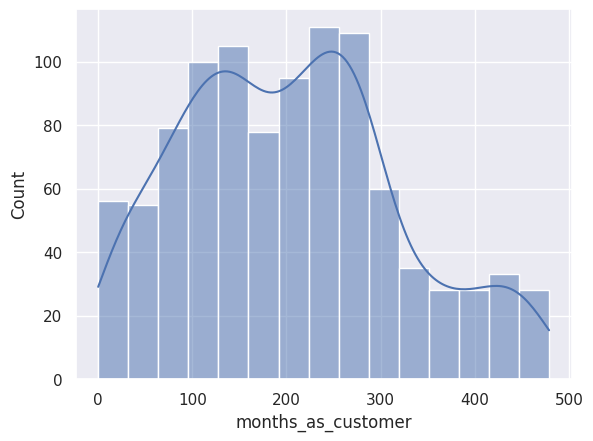

In [14]:
sns.histplot(df['months_as_customer'],kde=True)

<Axes: xlabel='policy_deductable', ylabel='Count'>

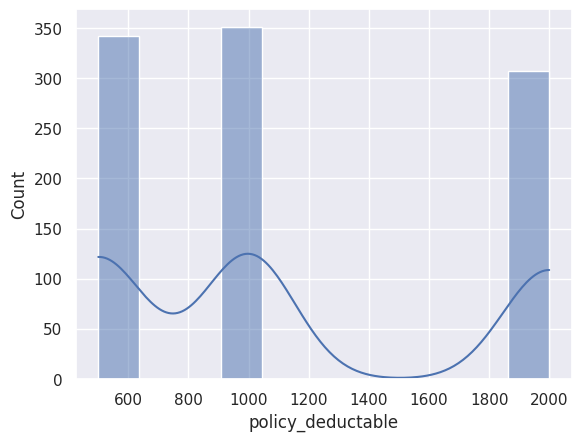

In [15]:
sns.histplot(df['policy_deductable'],kde=True)

Lets check more about policy_deductable

In [16]:
df['policy_deductable'].value_counts()

,count
policy_deductable,
1000,351
500,342
2000,307


so this has to be a categorical value

In [17]:
df['policy_deductable'] = df['policy_deductable'].astype('category')

<Axes: xlabel='policy_annual_premium', ylabel='Count'>

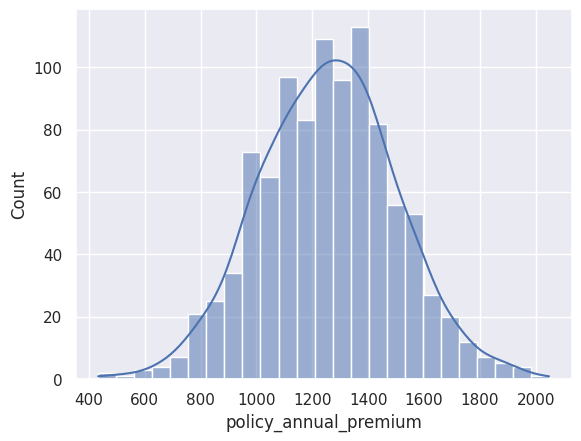

In [18]:
sns.histplot(df['policy_annual_premium'],kde=True)

<Axes: xlabel='umbrella_limit', ylabel='Count'>

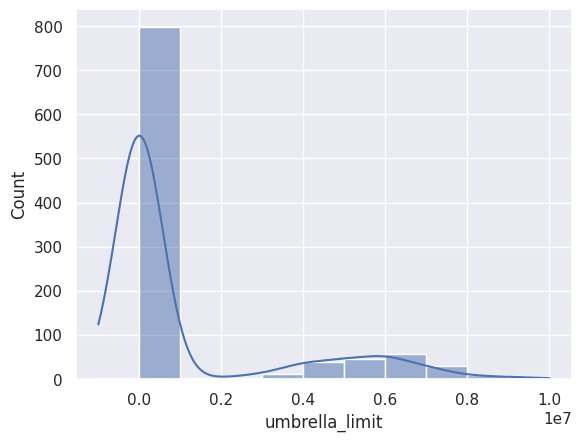

In [19]:
sns.histplot(df['umbrella_limit'],kde=True)

In [20]:
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


Umbrella Limit cant be negative

In [21]:
df = df[df['umbrella_limit']>=0]

In [22]:
df['umbrella_limit_bin'] = pd.cut(
    df['umbrella_limit'],
    bins=[-1, 0, 3_000_000, 5_000_000, 10_000_000],
    labels=['None', 'Low', 'Medium', 'High']
)

<ipython-input-22-182a7d252210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umbrella_limit_bin'] = pd.cut(


In [23]:
df['umbrella_limit_bin'].value_counts()

,count
umbrella_limit_bin,
None,798
High,101
Medium,85
Low,15


In [24]:
df['umbrella_limit_log'] = np.log1p(df['umbrella_limit'])

<ipython-input-24-bc46a322a985>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umbrella_limit_log'] = np.log1p(df['umbrella_limit'])


In [25]:
df.shape

(999, 41)

In [26]:
df['capital-gains'].value_counts()

,count
capital-gains,
0,507
46300,5
68500,4
51500,4
67800,3
...,...
30800,1
42300,1
12800,1


<Axes: xlabel='capital-gains', ylabel='Count'>

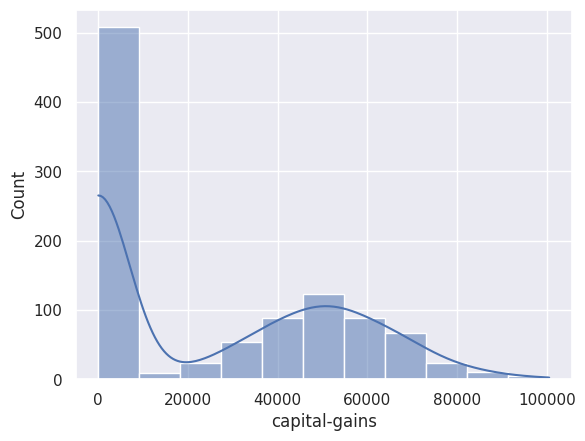

In [27]:
sns.histplot(df['capital-gains'],kde=True)

But after further checking we found out capital gains are generally zero in an insurance company

In [28]:
df['capital-gains_log'] = np.log1p(df['capital-gains'])

<Axes: xlabel='number_of_vehicles_involved', ylabel='Count'>

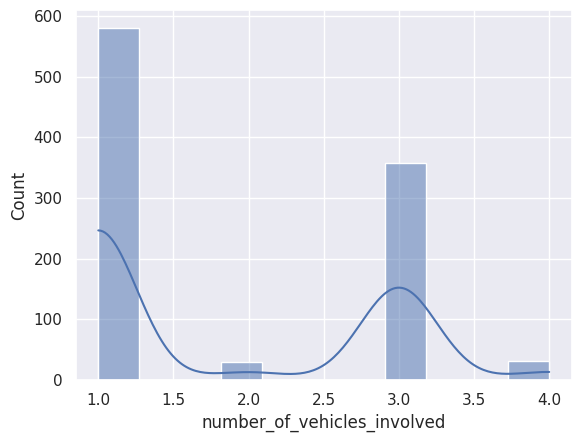

In [29]:
sns.histplot(df['number_of_vehicles_involved'],kde=True)

In [30]:
df['number_of_vehicles_involved'].value_counts()

,count
number_of_vehicles_involved,
1,580
3,358
4,31
2,30


In [31]:
df['number_of_vehicles_involved'] = df['number_of_vehicles_involved'].astype('category')

<Axes: xlabel='bodily_injuries', ylabel='Count'>

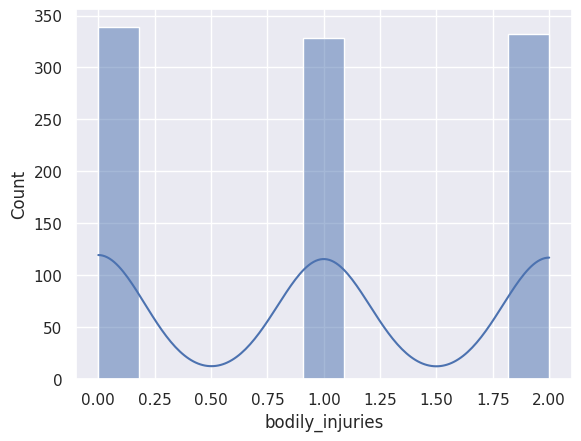

In [32]:
sns.histplot(df['bodily_injuries'],kde=True)

In [33]:
df['bodily_injuries'].value_counts()

,count
bodily_injuries,
0,339
2,332
1,328


In [34]:
df['bodily_injuries'] = df['bodily_injuries'].astype('category')

<Axes: xlabel='witnesses', ylabel='Count'>

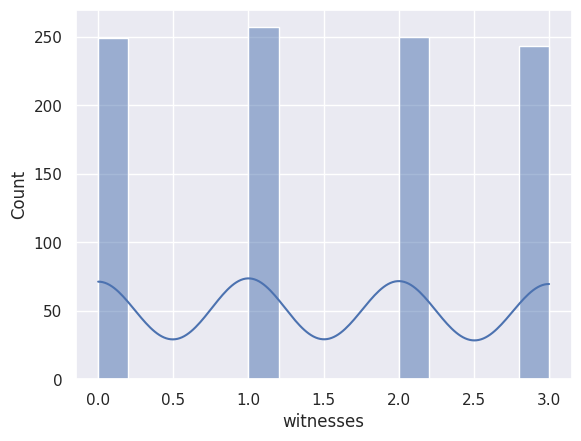

In [35]:
sns.histplot(df['witnesses'],kde=True)

In [36]:
df['witnesses'].value_counts()

,count
witnesses,
1,257
2,250
0,249
3,243


In [37]:
df['witnesses'] = df['witnesses'].astype('category')

<Axes: xlabel='total_claim_amount', ylabel='Count'>

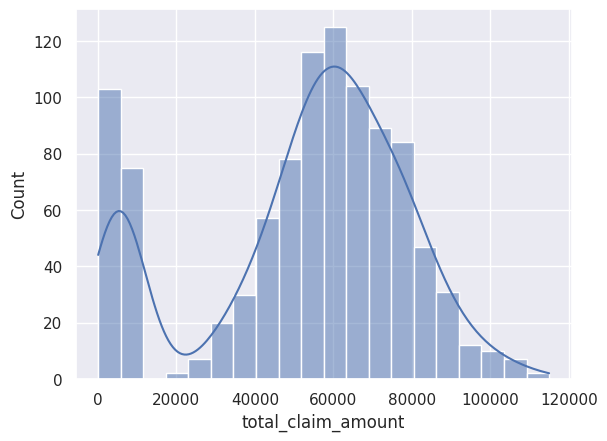

In [38]:
sns.histplot(df['total_claim_amount'],kde=True)

We keep the zeros as they might be valid in this case

In [39]:
df['total_claim_amount_log'] = np.log1p(df['total_claim_amount'])

<Axes: xlabel='injury_claim', ylabel='Count'>

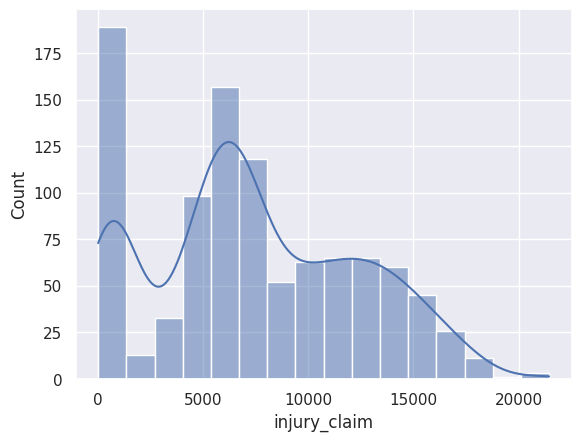

In [40]:
sns.histplot(df['injury_claim'],kde=True)

In [41]:
df['injury_claim_log'] = np.log1p(df['injury_claim'])

<Axes: xlabel='property_claim', ylabel='Count'>

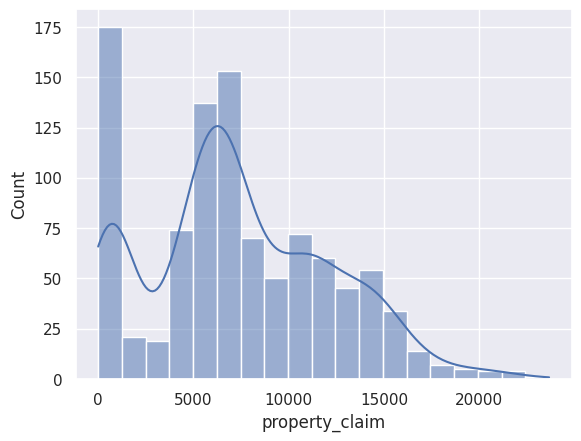

In [42]:
sns.histplot(df['property_claim'],kde=True)

In [43]:
df['property_claim_log'] = np.log1p(df['property_claim'])

<Axes: xlabel='vehicle_claim', ylabel='Count'>

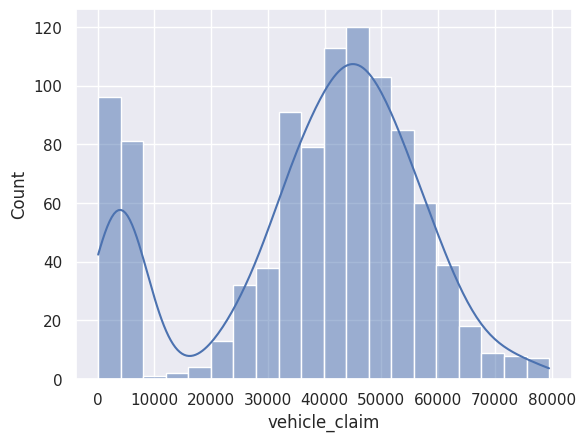

In [44]:
sns.histplot(df['vehicle_claim'],kde=True)

In [45]:
df['vehicle_claim_log'] = np.log1p(df['vehicle_claim'])

<Axes: xlabel='auto_year', ylabel='Count'>

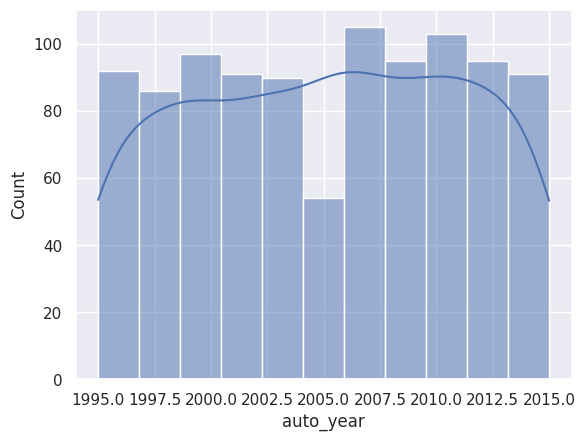

In [46]:
sns.histplot(df['auto_year'],kde=True)

In [47]:
df['auto_year'].value_counts()

,count
auto_year,
1995,56
1999,55
2005,54
2006,53
2011,53
2007,52
2003,51
2009,50
2010,50


In [48]:
df['auto_year'] = df['auto_year'].astype('category')

In [49]:
cat_cols = df.select_dtypes(include='object').columns.to_list()

In [50]:
cat_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

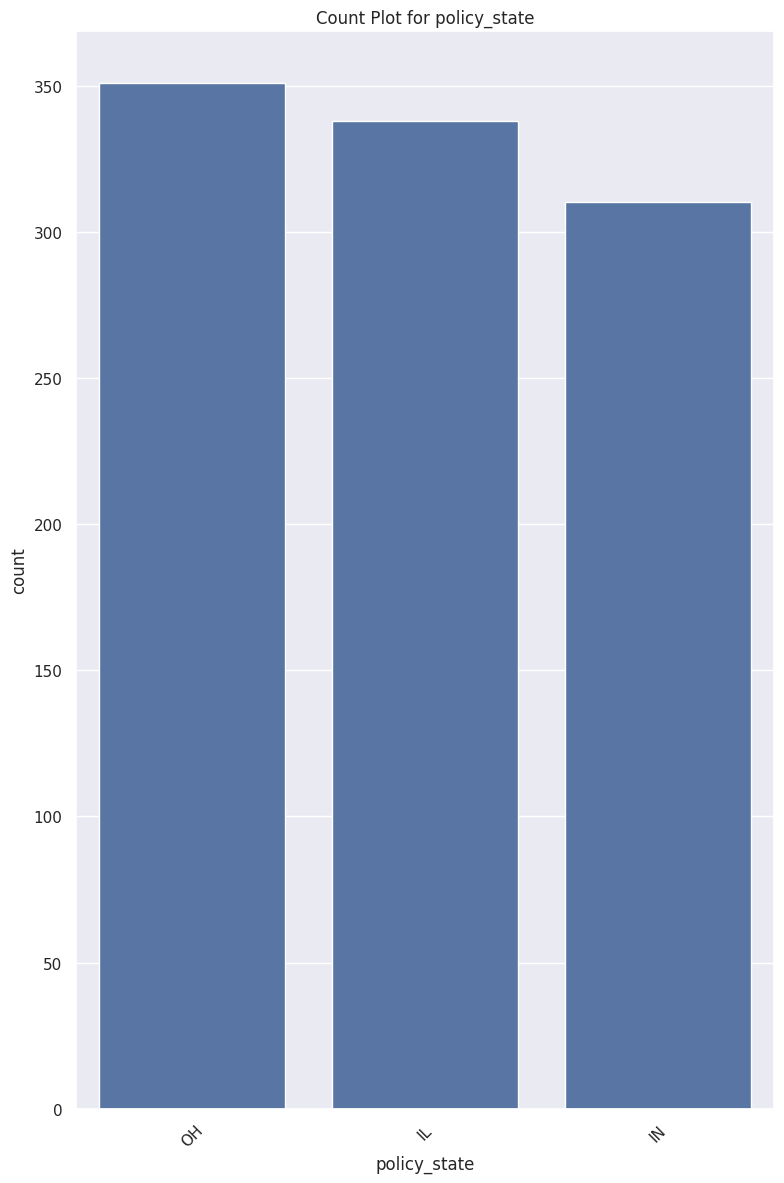

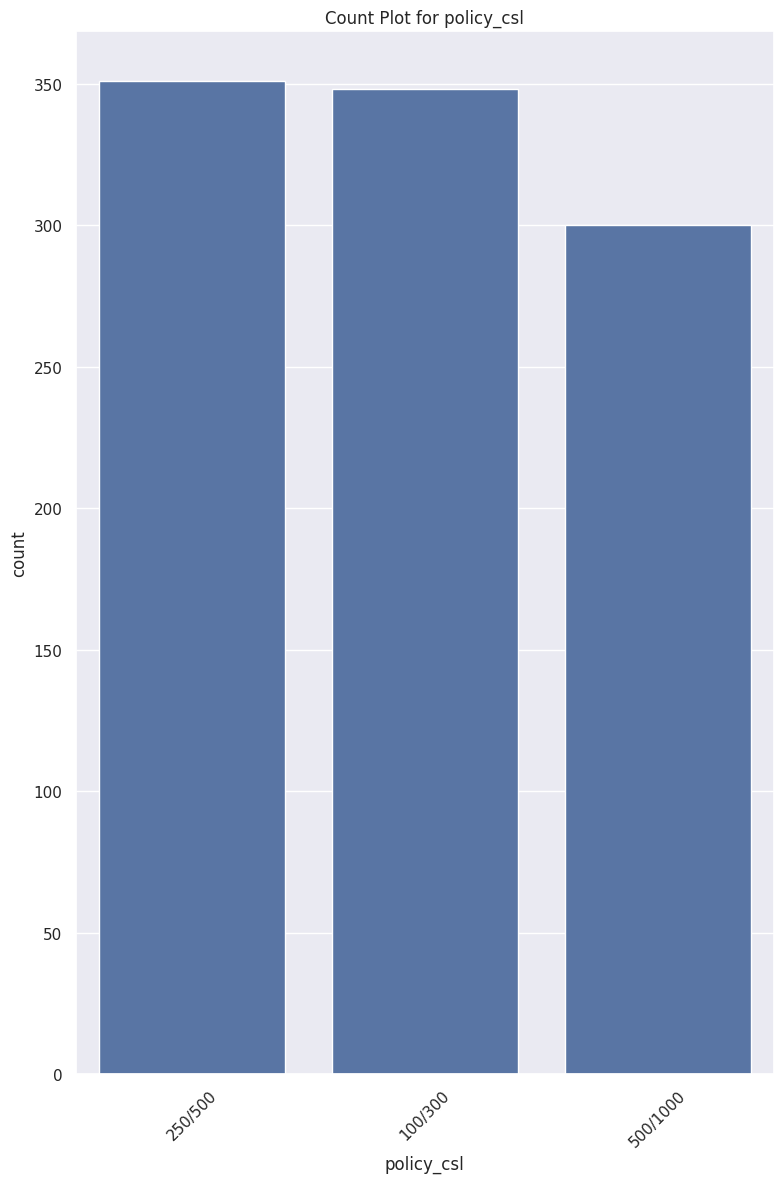

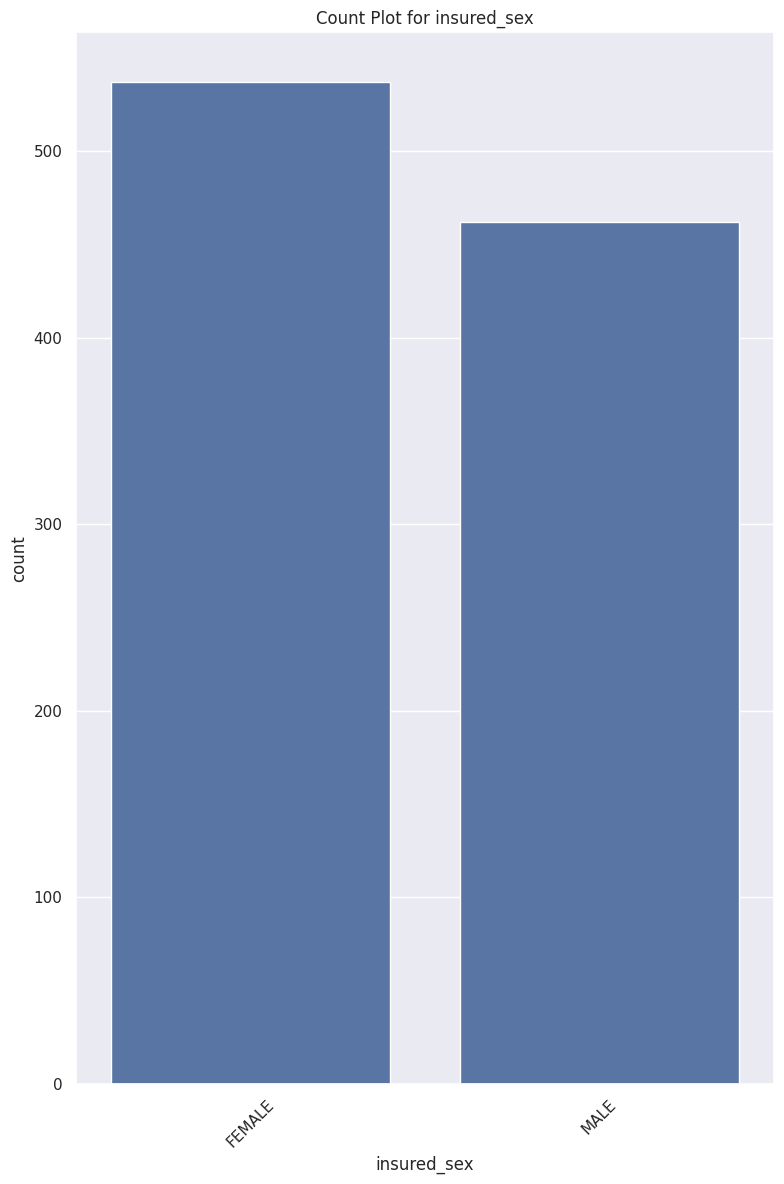

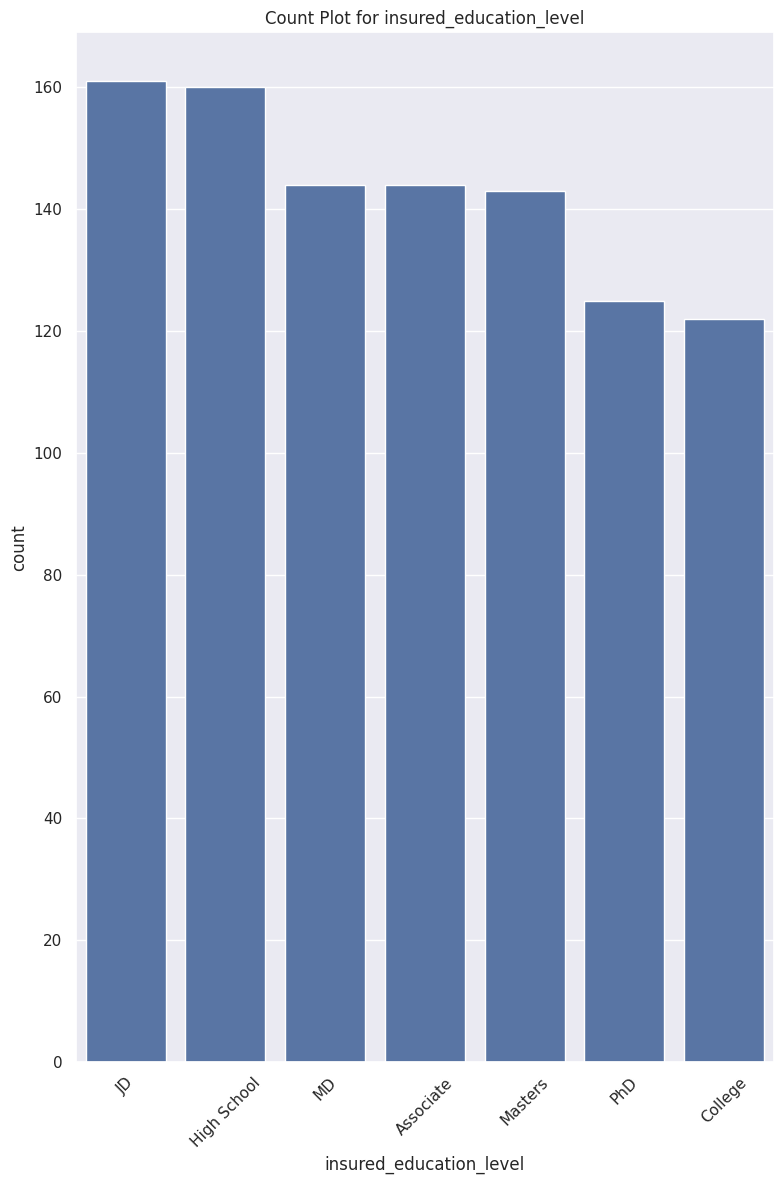

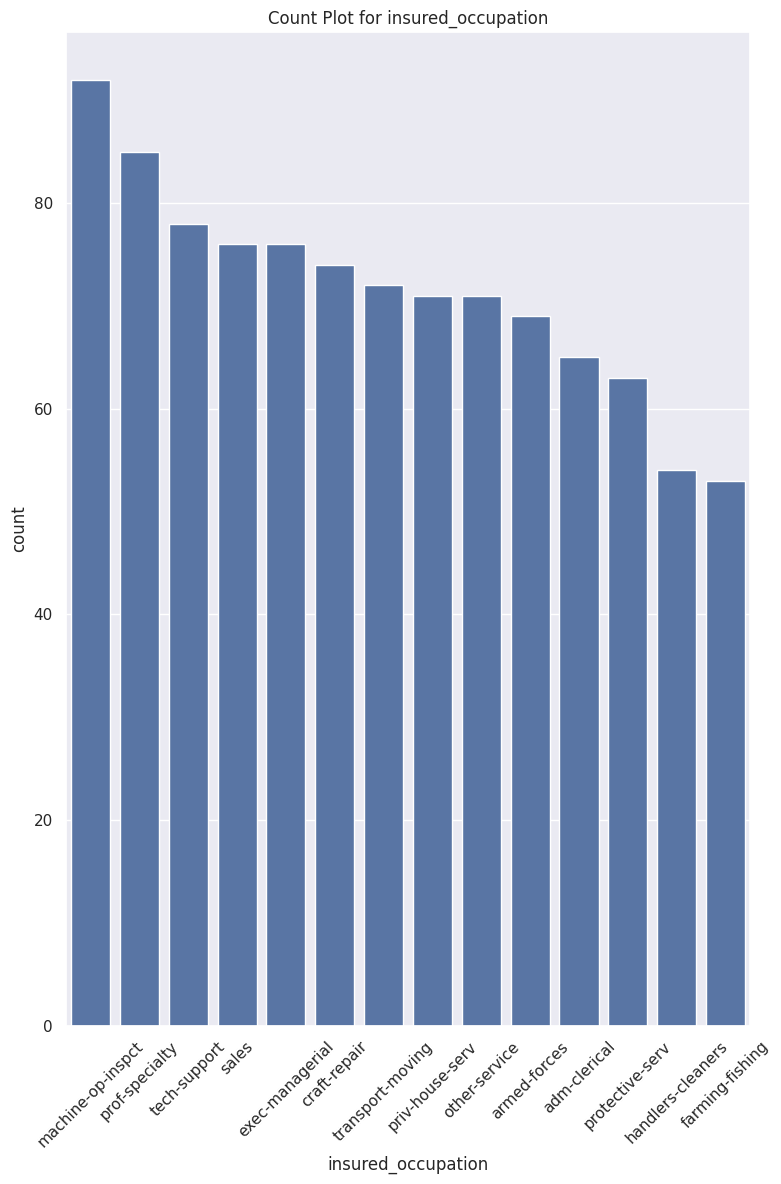

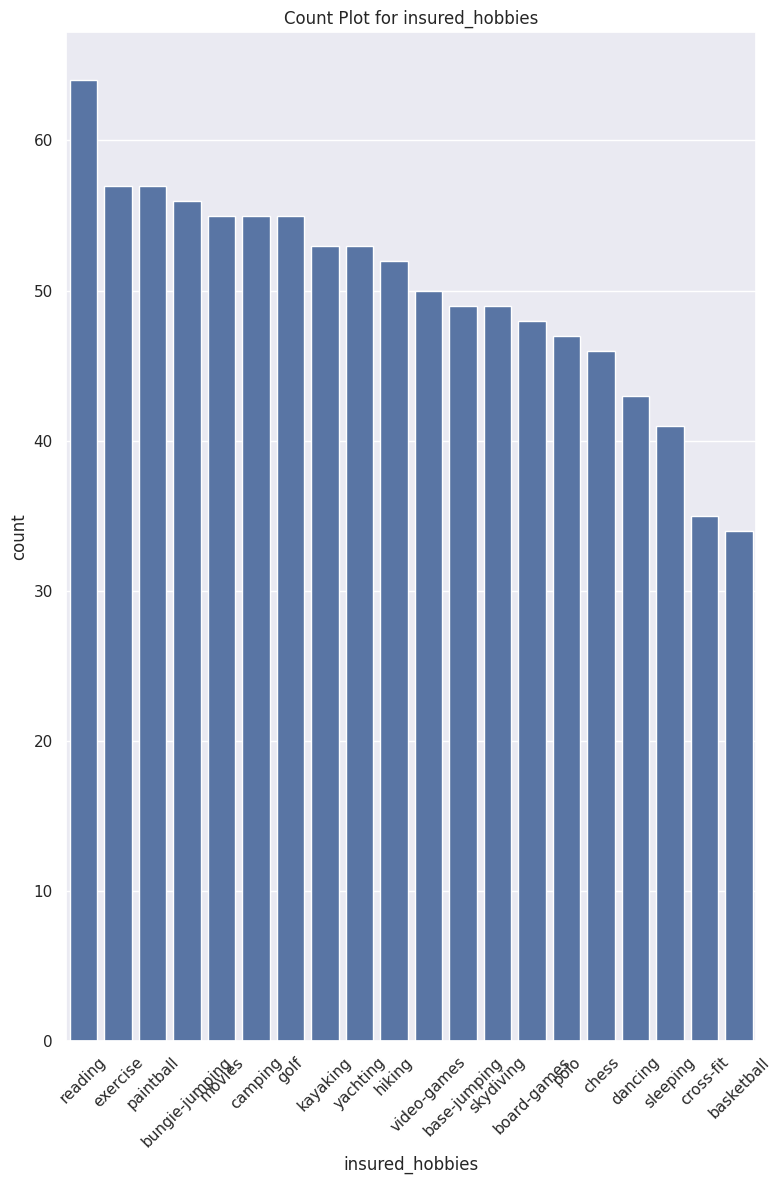

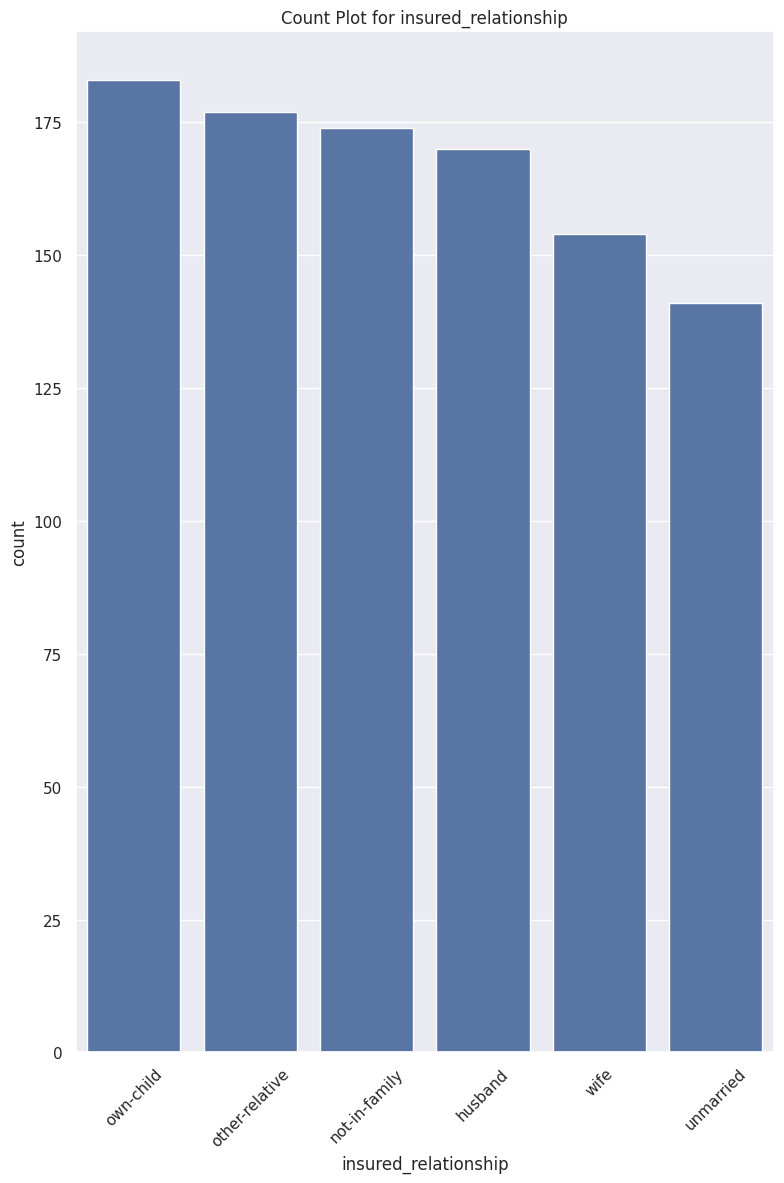

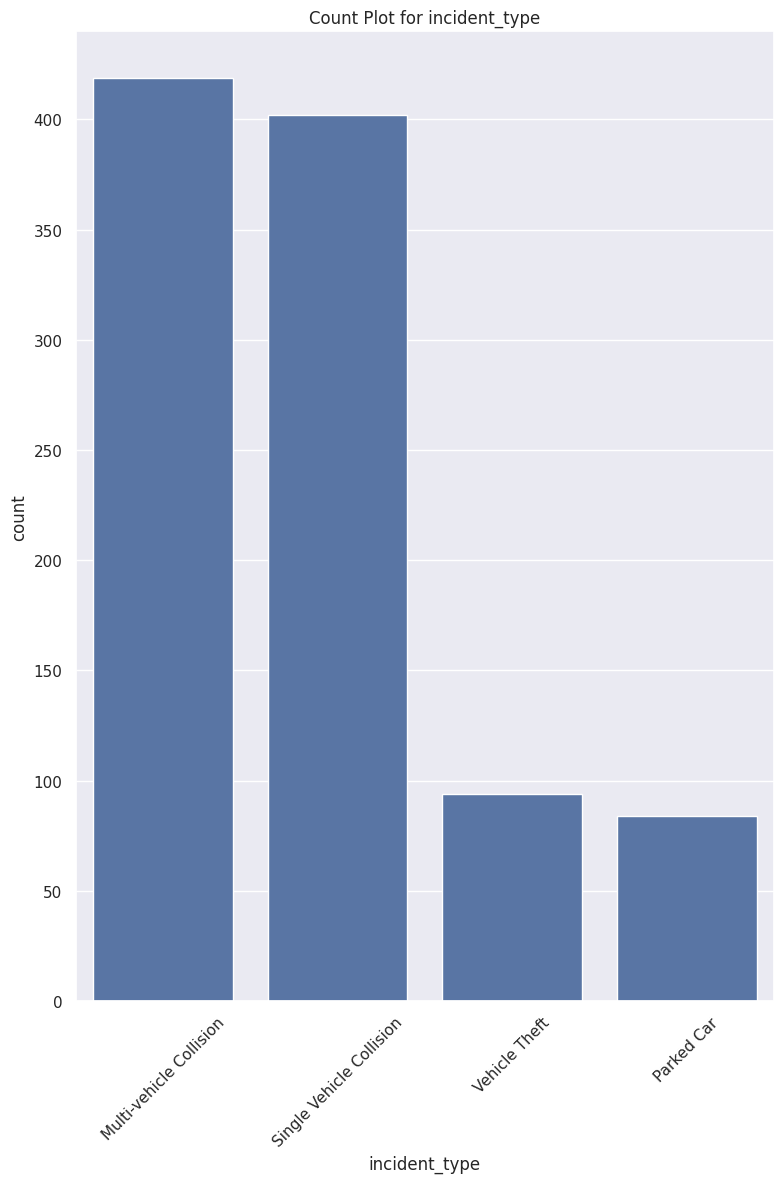

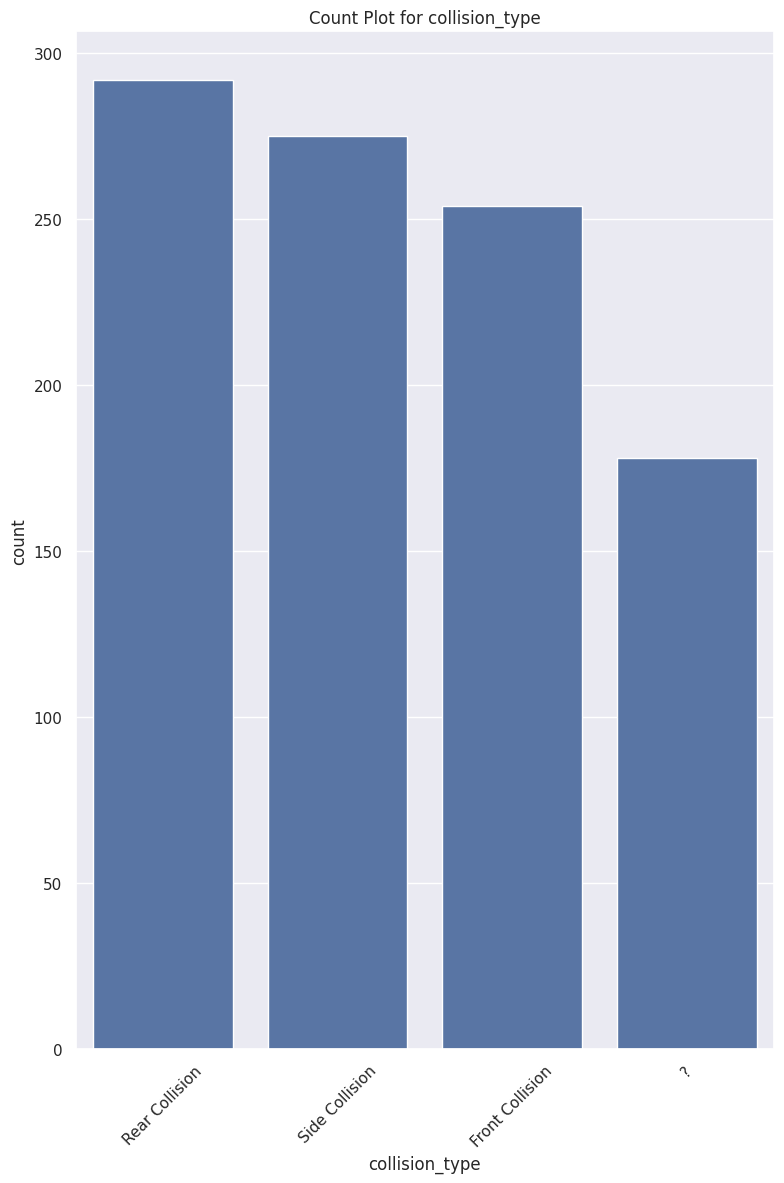

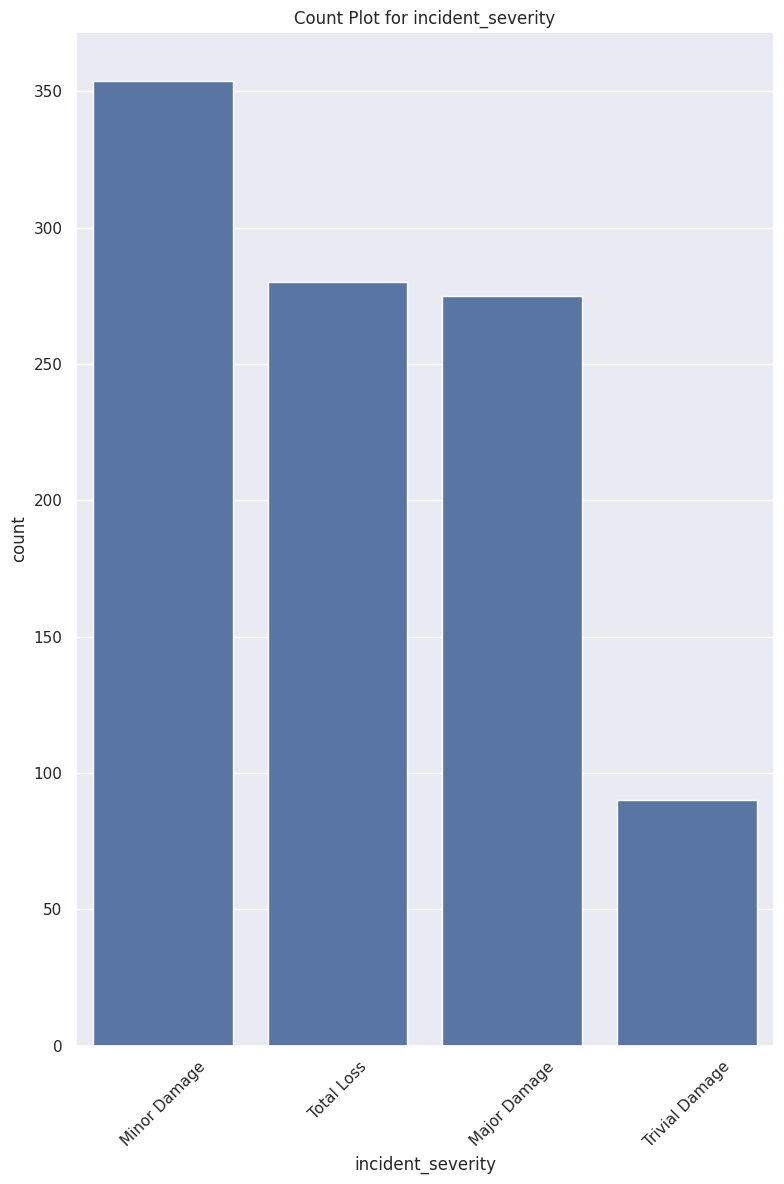

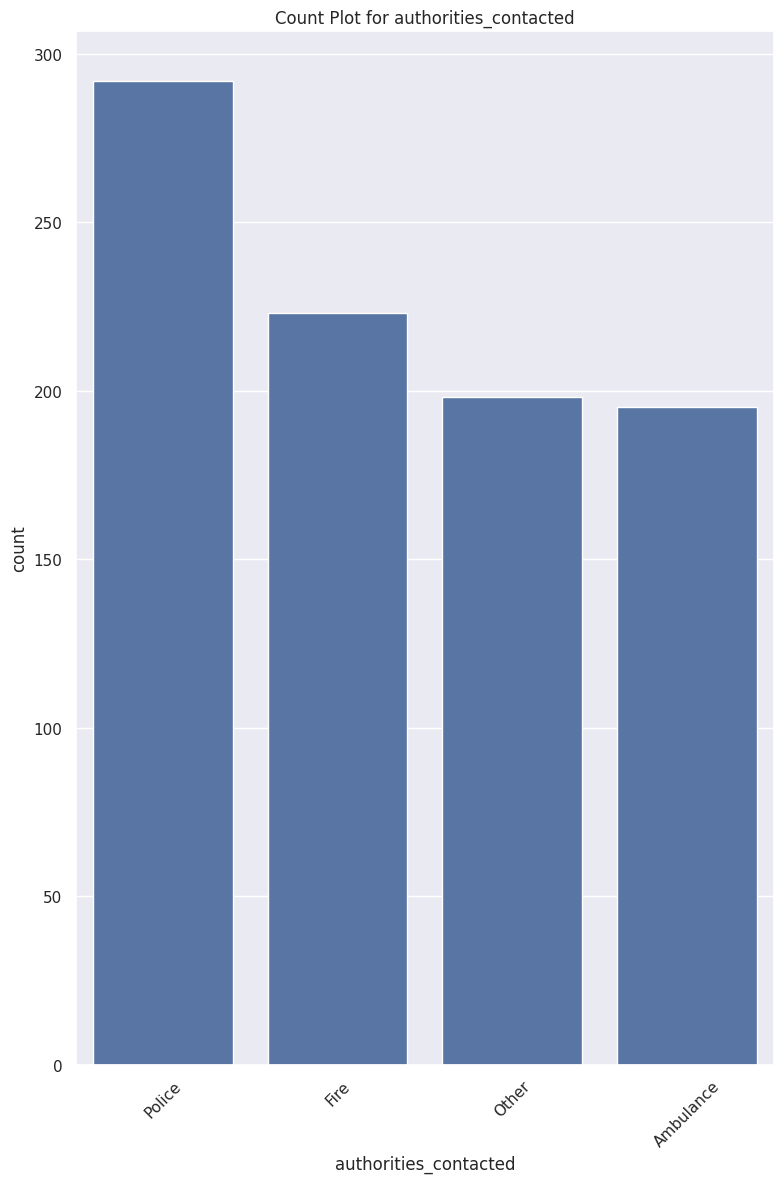

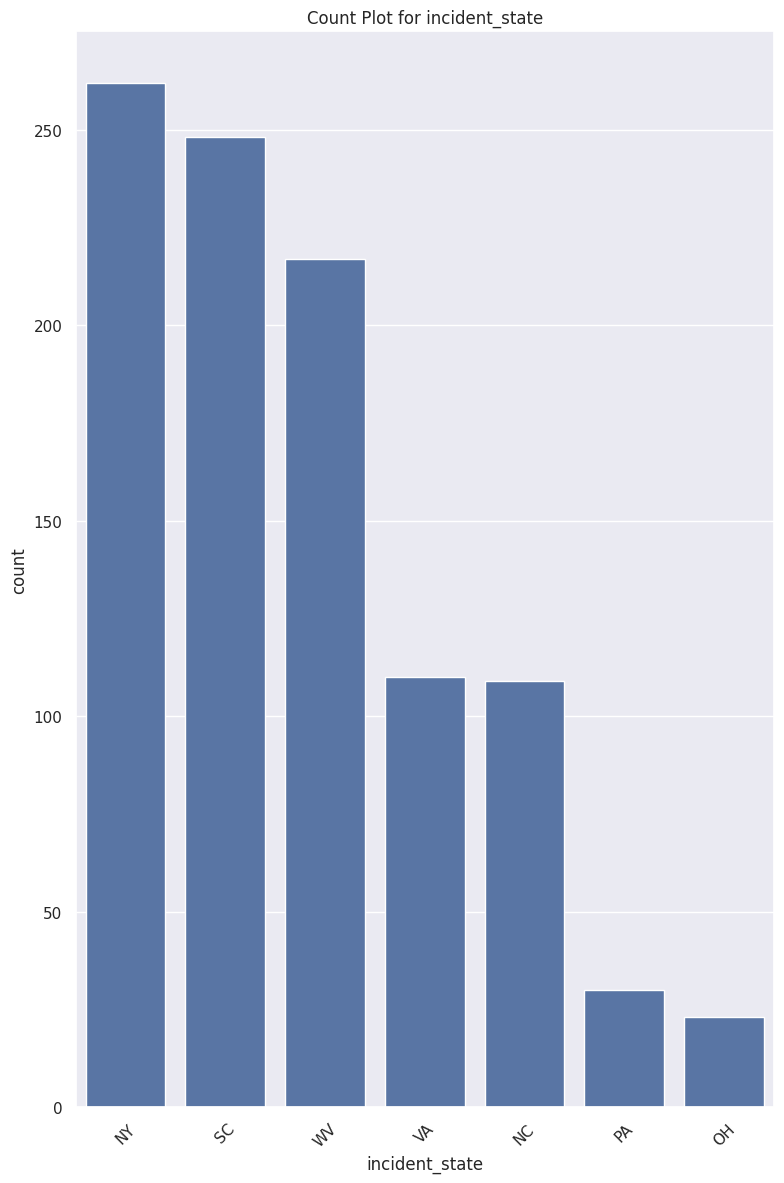

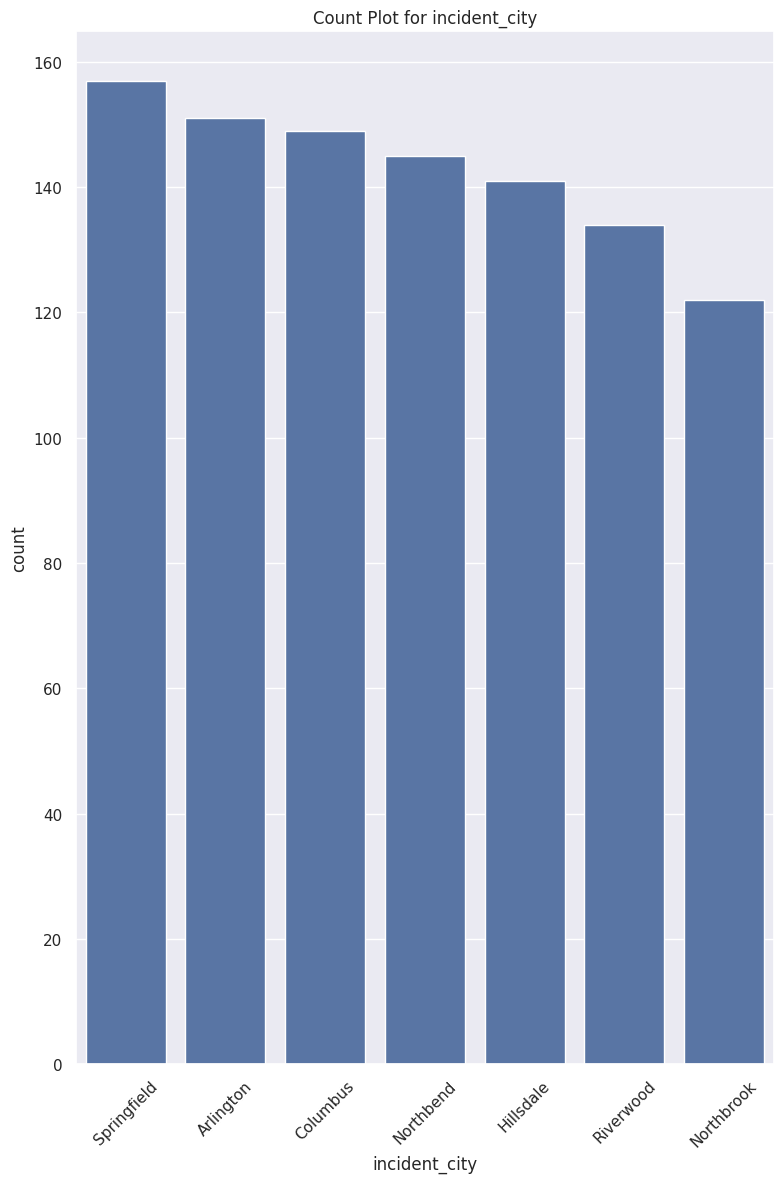

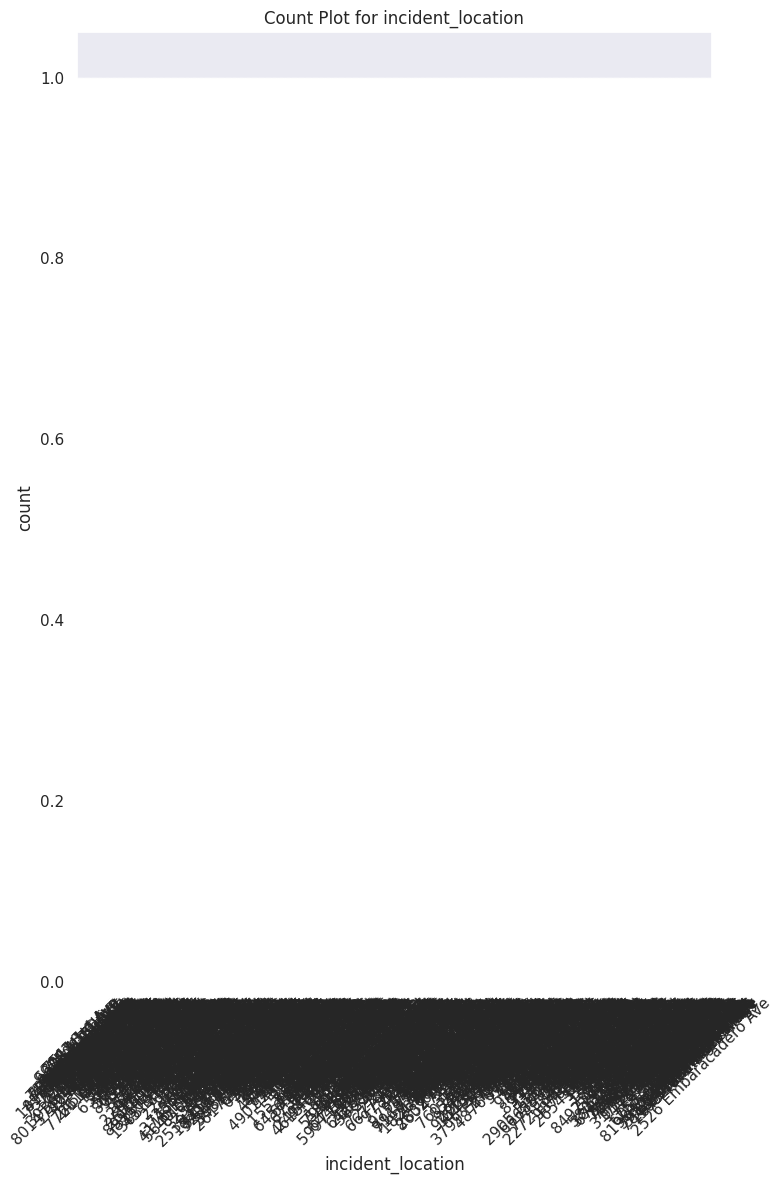

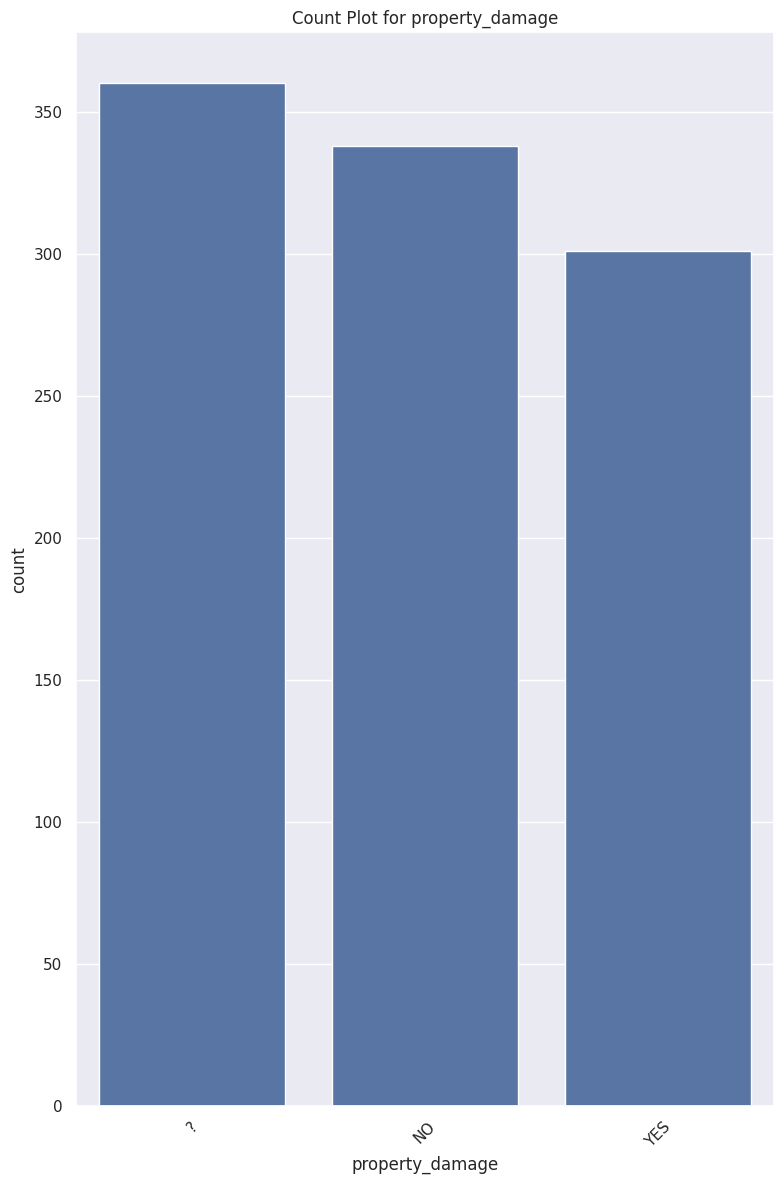

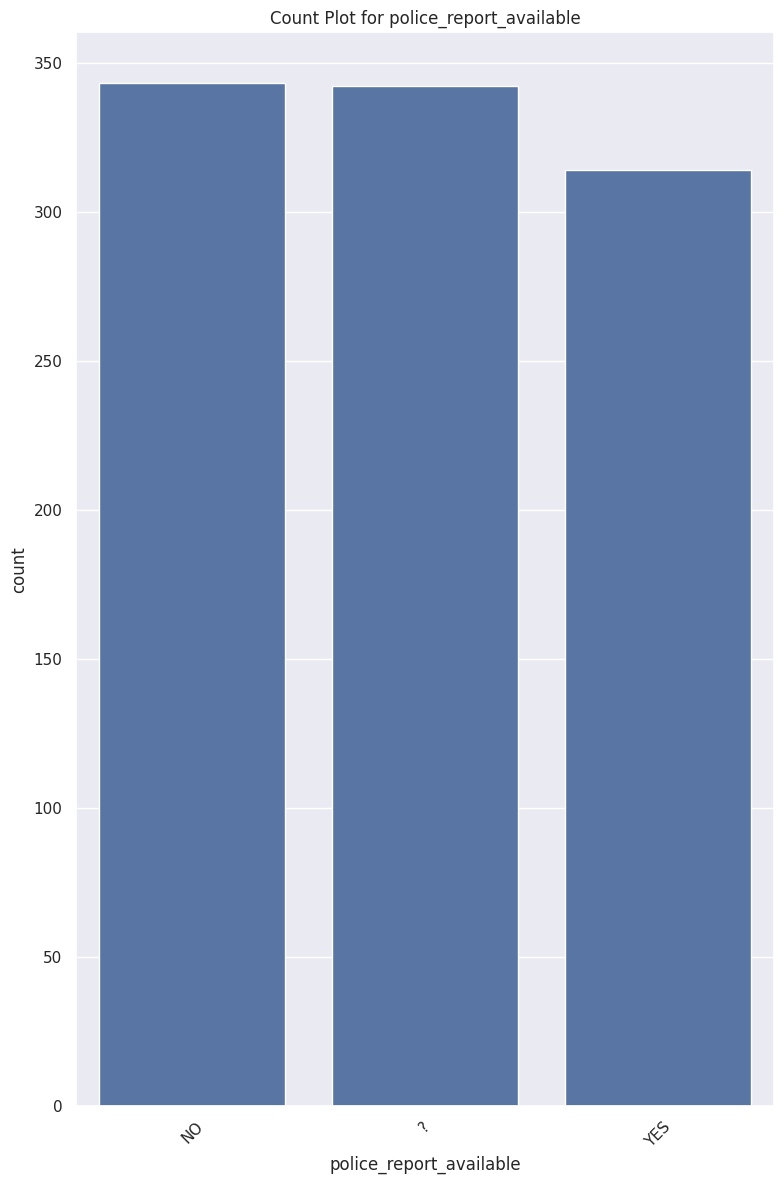

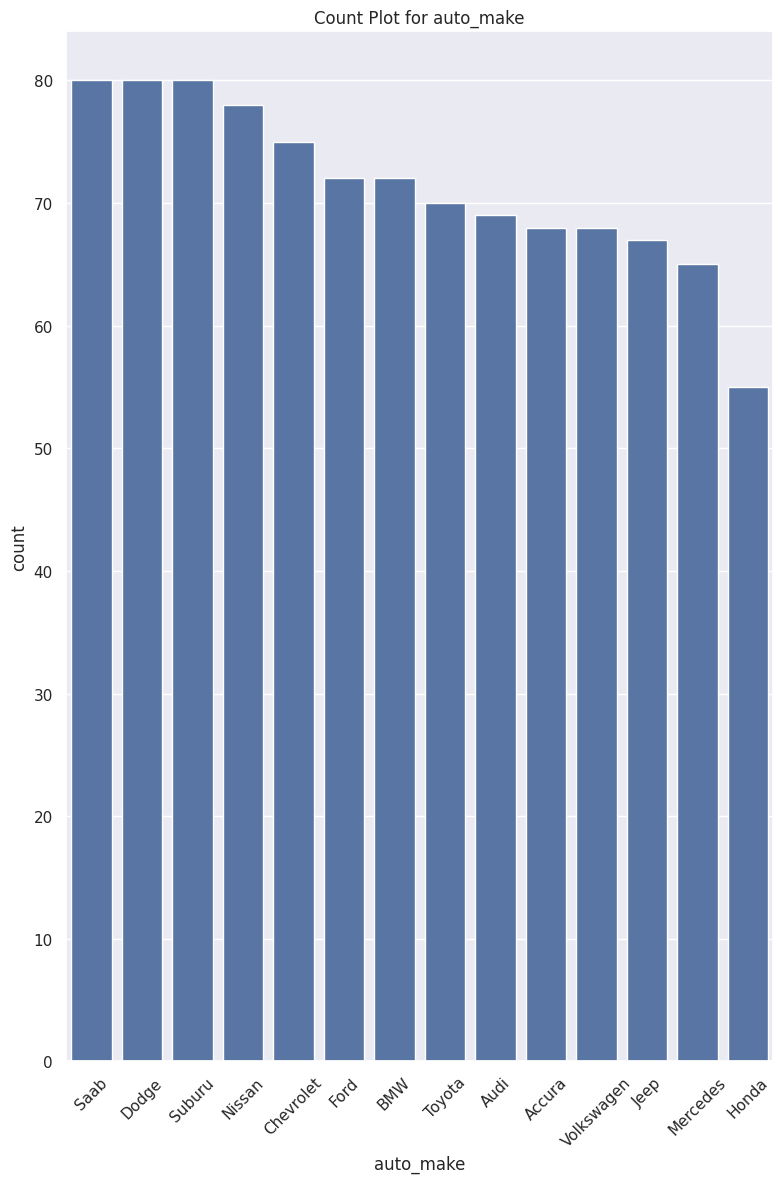

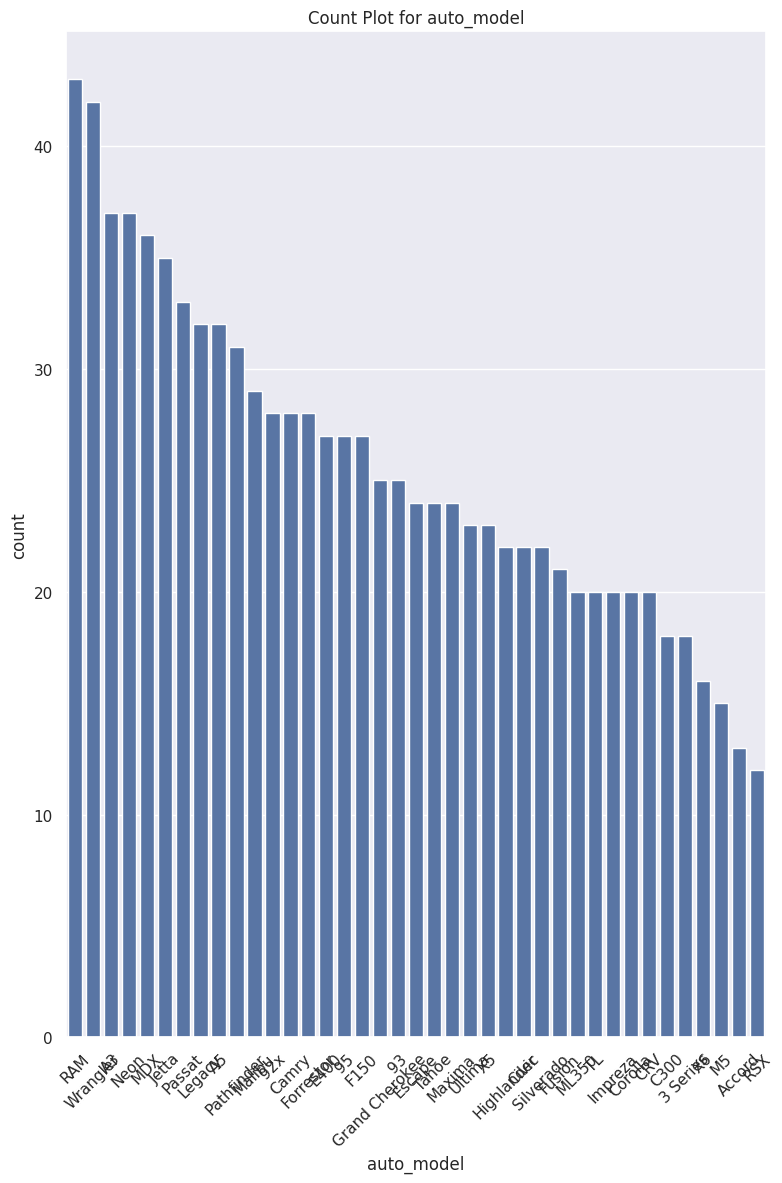

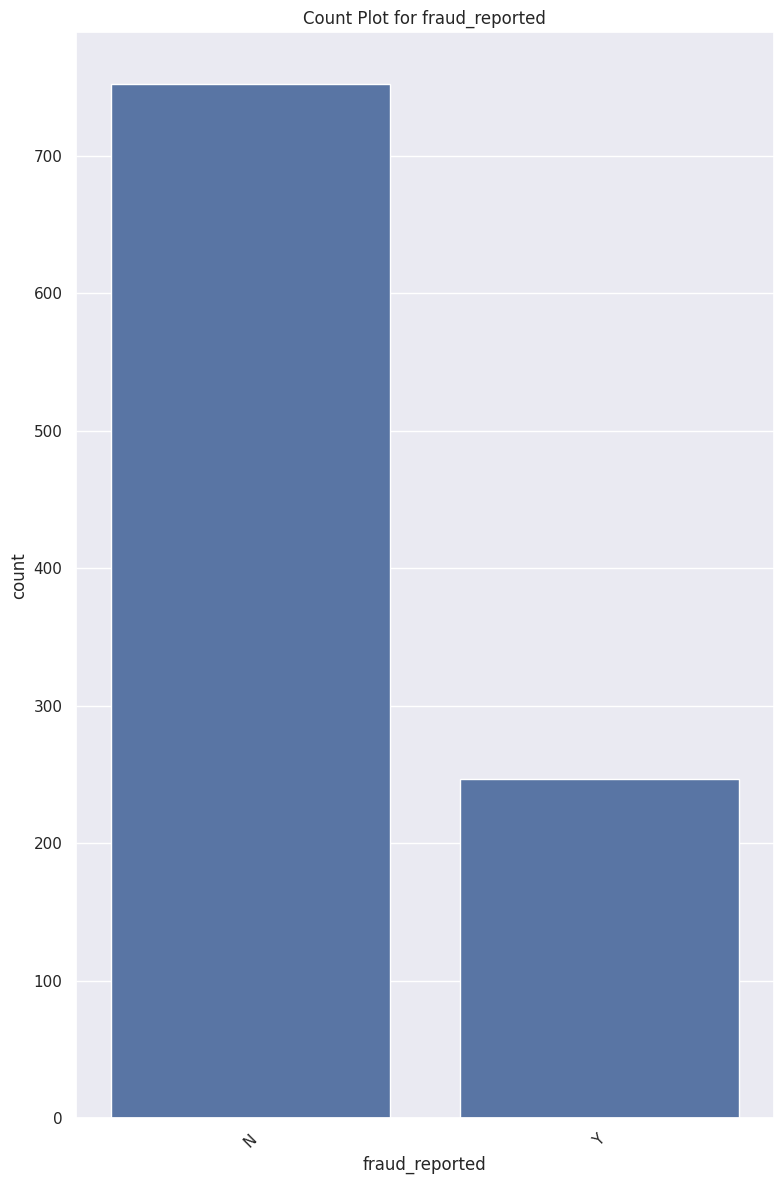

In [51]:
for i in cat_cols:
  plt.figure(figsize=(8,12))
  sns.countplot(x=i,data=df,order=df[i].value_counts().index)
  plt.title(f'Count Plot for {i}')
  plt.xticks(rotation = 45)
  plt.tight_layout()
  plt.show()

Some of the feature have a '?' as there value Replacing it as 'unkown' and treat the feauture as category

In [52]:
df['collision_type'] = df['collision_type'].replace({'?':'unknown'})

<Axes: xlabel='property_damage', ylabel='fraud_reported'>

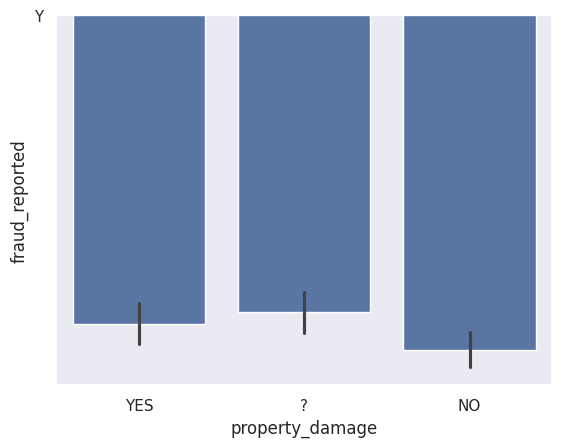

In [53]:
sns.barplot(x='property_damage', y='fraud_reported', data=df)

Correlation exists so we are not going to drop the unkown values

In [54]:
df['property_damage'] = df['property_damage'].replace({'?':'unknown'})
df['police_report_available'] = df['police_report_available'].replace({'?':'unknown'})

In [55]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [56]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,195


In [57]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [58]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')

In [59]:
# Target variable
df['fraud_reported'].value_counts(normalize=True)

,proportion
fraud_reported,
N,0.752753
Y,0.247247


In [60]:
df['fraud_reported'] = df['fraud_reported'].map({'N':0,'Y':1})

### Feature engineering

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_number                999 non-null    int64         
 3   policy_bind_date             999 non-null    datetime64[ns]
 4   policy_state                 999 non-null    object        
 5   policy_csl                   999 non-null    object        
 6   policy_deductable            999 non-null    category      
 7   policy_annual_premium        999 non-null    float64       
 8   umbrella_limit               999 non-null    int64         
 9   insured_zip                  999 non-null    int64         
 10  insured_sex                  999 non-null    object        
 11  insured_education_level      999 non-null    objec

In [62]:
df['claim_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']

In [63]:
df['claim_ratio'].head()

,claim_ratio
0,50.898778
1,4.234811
2,24.519864
3,44.782234
4,4.103769


<Axes: xlabel='claim_ratio', ylabel='Count'>

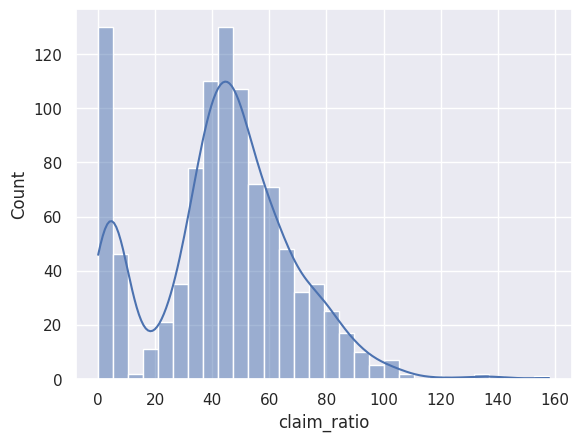

In [64]:
sns.histplot(df['claim_ratio'],kde=True)

In [65]:
df['claim_ratio_bin'] = pd.qcut(df['claim_ratio'], q=3, labels=['Low', 'Medium', 'High'])
df.drop('claim_ratio', axis=1, inplace=True)

In [66]:
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


<Axes: xlabel='umbrella_limit', ylabel='Count'>

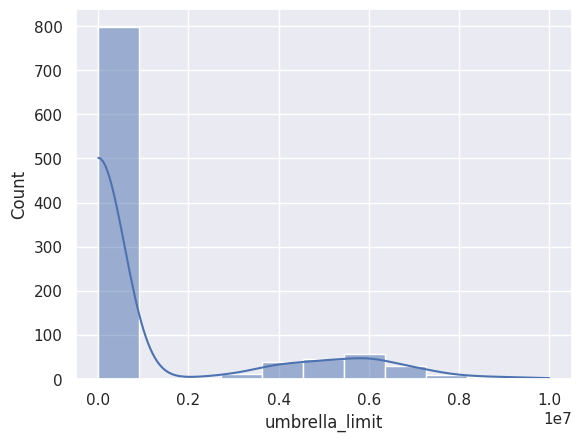

In [67]:
sns.histplot(df['umbrella_limit'],kde = True)

In [68]:
df['property_damage'] = df['property_damage'].replace({'NO': 0 , 'YES':1,'unknown':-1})

<ipython-input-68-59e6d2495e0d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['property_damage'] = df['property_damage'].replace({'NO': 0 , 'YES':1,'unknown':-1})


In [69]:
df['police_report_available'] = df['police_report_available'].replace({'NO': 0 , 'YES':1,'unknown':-1})

<ipython-input-69-18f156974bd5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['police_report_available'] = df['police_report_available'].replace({'NO': 0 , 'YES':1,'unknown':-1})


In [70]:
df['incident_month'] = df['incident_date'].dt.month
df['incident_dayofweek'] = df['incident_date'].dt.dayofweek
df['days_to_incident'] = (df['incident_date'] - df['policy_bind_date']).astype(int)

### Feature Selection

In [71]:
df_without_log = df.copy()

In [72]:
df_without_log.drop(columns=['capital-gains_log','total_claim_amount_log','injury_claim_log','property_claim_log','vehicle_claim_log','umbrella_limit_log'],axis =1,inplace = True)

In [73]:
df_without_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_number                999 non-null    int64         
 3   policy_bind_date             999 non-null    datetime64[ns]
 4   policy_state                 999 non-null    object        
 5   policy_csl                   999 non-null    object        
 6   policy_deductable            999 non-null    category      
 7   policy_annual_premium        999 non-null    float64       
 8   umbrella_limit               999 non-null    int64         
 9   insured_zip                  999 non-null    int64         
 10  insured_sex                  999 non-null    object        
 11  insured_education_level      999 non-null    objec

In [74]:
df.drop(columns=['capital-gains','total_claim_amount','injury_claim','property_claim','vehicle_claim','umbrella_limit'],axis =1,inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_number                999 non-null    int64         
 3   policy_bind_date             999 non-null    datetime64[ns]
 4   policy_state                 999 non-null    object        
 5   policy_csl                   999 non-null    object        
 6   policy_deductable            999 non-null    category      
 7   policy_annual_premium        999 non-null    float64       
 8   insured_zip                  999 non-null    int64         
 9   insured_sex                  999 non-null    object        
 10  insured_education_level      999 non-null    object        
 11  insured_occupation           999 non-null    objec

In [76]:
(df['total_claim_amount_log'] - df['vehicle_claim_log'] - df['property_claim_log'] - df['injury_claim_log']).value_counts().head()

,count
-17.060738,3
-12.645217,3
-18.173979,3
-18.093638,3
-16.943197,3


In [77]:
(df_without_log['total_claim_amount'] - df_without_log['vehicle_claim'] - df_without_log['property_claim'] - df_without_log['injury_claim']).value_counts().head()

,count
0,999


In [78]:
df.drop(columns=['policy_number','incident_date','policy_bind_date','insured_zip','incident_location','vehicle_claim_log','property_claim_log','injury_claim_log'],axis = 1, inplace = True)
df_without_log.drop(columns=['policy_number','incident_date','policy_bind_date','insured_zip','incident_location','vehicle_claim','property_claim','injury_claim'],axis = 1, inplace = True)

We can see that from the original data before log transformation those total_claim_amount = sum of vehicle claim, property claim, injury claim so we can remove these 3 columns and keep the total_claim_amount

In [79]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
df[cat_cols] = df[cat_cols].astype('category')

cat_cols_wl = df_without_log.select_dtypes(include='object').columns.to_list()
df_without_log[cat_cols] = df_without_log[cat_cols].astype('category')

In [80]:
num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()
num_cols_wl = df_without_log.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

In [81]:
num_cols

['months_as_customer',
 'age',
 'policy_annual_premium',
 'capital-loss',
 'incident_hour_of_the_day',
 'property_damage',
 'police_report_available',
 'fraud_reported',
 'umbrella_limit_log',
 'capital-gains_log',
 'total_claim_amount_log',
 'incident_month',
 'incident_dayofweek',
 'days_to_incident']

In [82]:
num_cols_wl

['months_as_customer',
 'age',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'property_damage',
 'police_report_available',
 'total_claim_amount',
 'fraud_reported',
 'incident_month',
 'incident_dayofweek',
 'days_to_incident']

In [83]:
corr = df[num_cols].corr()
corr_wl = df_without_log[num_cols_wl].corr()

In [84]:
corr['fraud_reported'].sort_values(ascending = False)

,fraud_reported
fraud_reported,1.000000
total_claim_amount_log,0.173741
umbrella_limit_log,0.059523
months_as_customer,0.020951
incident_dayofweek,0.013362
age,0.012338
incident_hour_of_the_day,0.004429
days_to_incident,0.001458
policy_annual_premium,-0.014290
capital-loss,-0.014325


In [85]:
corr_wl['fraud_reported'].sort_values(ascending = False)

,fraud_reported
fraud_reported,1.000000
total_claim_amount,0.164781
umbrella_limit,0.058131
months_as_customer,0.020951
incident_dayofweek,0.013362
age,0.012338
incident_hour_of_the_day,0.004429
days_to_incident,0.001458
policy_annual_premium,-0.014290
capital-loss,-0.014325


<Axes: >

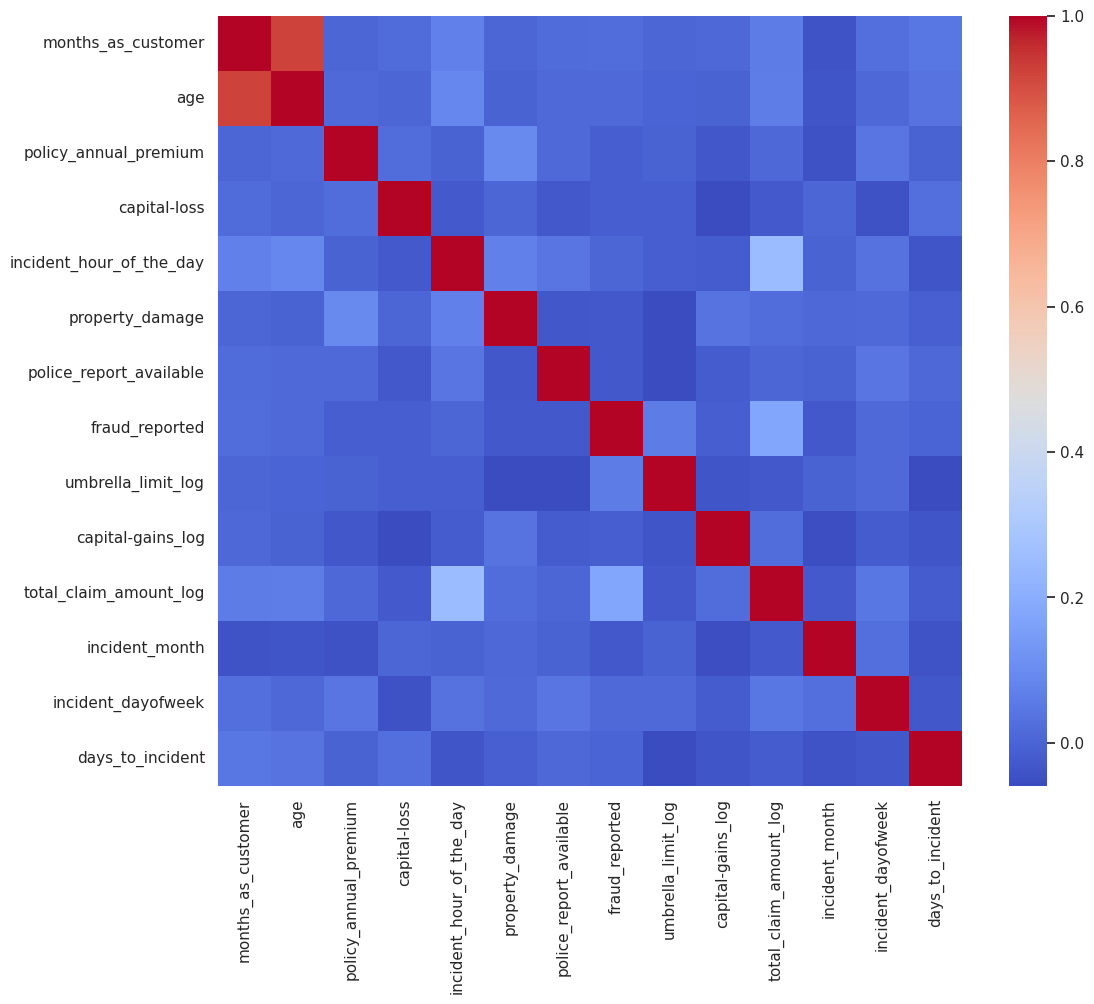

In [86]:
plt.figure(figsize=(12, 10))
sns.heatmap(data = corr,cmap='coolwarm')

<Axes: >

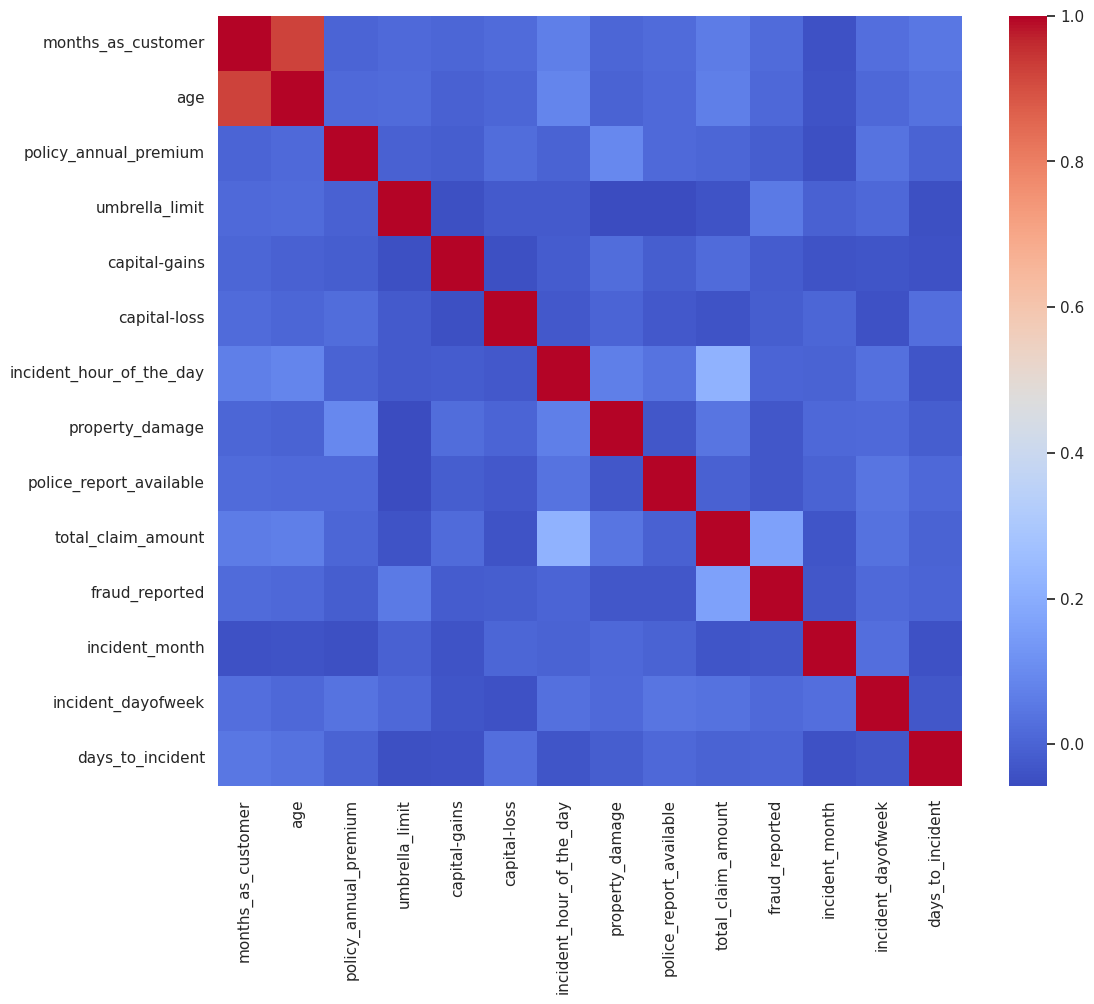

In [87]:
plt.figure(figsize=(12, 10))
sns.heatmap(data = corr_wl,cmap='coolwarm')

In [88]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
x = df.drop(columns=['fraud_reported'],axis = 1)
y = df['fraud_reported']
x_wl = df_without_log.drop(columns=['fraud_reported'],axis = 1)
y_wl = df_without_log['fraud_reported']

In [90]:
x= pd.get_dummies(x,drop_first= True)
x_const = add_constant(x)
x_wl= pd.get_dummies(x_wl,drop_first= True)
x_const_wl = add_constant(x_wl)

In [91]:
x_const = x_const.astype(float)
x_const_wl = x_const_wl.astype(float)

In [92]:
vif = {}

for i in range(x_const.shape[1]):
  feature_name = x_const.columns[i]
  vif_value = variance_inflation_factor(x_const.values,i)
  vif[feature_name] = vif_value

vif_wl = {}

for i in range(x_const_wl.shape[1]):
  feature_name = x_const_wl.columns[i]
  vif_value = variance_inflation_factor(x_const_wl.values,i)
  vif_wl[feature_name] = vif_value

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [93]:
vif_df = pd.DataFrame.from_dict(vif, orient='index', columns=['VIF']).sort_values(by='VIF', ascending=False)
vif_df_wl = pd.DataFrame.from_dict(vif_wl, orient='index', columns=['VIF']).sort_values(by='VIF', ascending=False)

In [94]:
pd.set_option('display.max_rows', None)

In [95]:
vif_df

,VIF
days_to_incident,1.165250
claim_ratio_bin_Medium,1.040330
auto_model_Jetta,1.011548
incident_city_Hillsdale,1.009334
auto_model_E400,1.007525
auto_model_Grand Cherokee,1.007375
auto_year_2004,1.007129
incident_city_Riverwood,1.006342
auto_year_1997,1.006210
auto_make_Saab,1.005970


In [96]:
vif_df_wl

,VIF
umbrella_limit_bin_High,2.962206
claim_ratio_bin_High,1.516384
collision_type_unknown,1.388537
umbrella_limit_bin_Medium,1.264601
incident_type_Vehicle Theft,1.166985
days_to_incident,1.164347
authorities_contacted_Unknown,1.161850
incident_type_Single Vehicle Collision,1.151030
incident_severity_Trivial Damage,1.130845
incident_type_Parked Car,1.124943


In [97]:
from sklearn.feature_selection import mutual_info_classif

In [98]:
mutual_info = mutual_info_classif(x,y,discrete_features='auto')
mutual_info_wl = mutual_info_classif(x_wl,y_wl,discrete_features='auto')

In [99]:
mi_scores = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)
mi_scores_wl = pd.Series(mutual_info_wl, index=x_wl.columns).sort_values(ascending=False)

In [100]:
mi_scores

,0
insured_hobbies_chess,0.069989
incident_severity_Minor Damage,0.036409
policy_deductable_1000,0.030913
incident_type_Parked Car,0.030129
auto_model_Silverado,0.029174
auto_year_2000,0.029069
authorities_contacted_Unknown,0.028959
auto_year_2015,0.027159
capital-gains_log,0.026884
insured_occupation_other-service,0.026275


In [101]:
mi_scores_wl

,0
incident_severity_Minor Damage,0.054233
collision_type_unknown,0.045938
insured_hobbies_chess,0.039099
policy_csl_500/1000,0.037619
auto_model_Ultima,0.037211
insured_hobbies_skydiving,0.029292
auto_year_1998,0.027656
policy_state_IN,0.025593
bodily_injuries_1,0.023529
insured_hobbies_cross-fit,0.022400


In [102]:
features_to_drop = [
    'capital-loss',
    'months_as_customer',
    'days_to_incident',
    'auto_make',
    'auto_model',
    'auto_year',
    'incident_city',
    'insured_hobbies',
    'umbrella_limit_bin',

]

In [103]:
features_to_drop_wl = [

   'days_to_incident',
    'incident_hour_of_the_day',
    'incident_dayofweek',
    'months_as_customer',
    'policy_annual_premium',
    'capital-loss',
    'capital-gains',
    'incident_month',
    'property_damage',
    'umbrella_limit_bin',
 ]

In [104]:
df.drop(columns=features_to_drop,axis = 1, inplace=True)
df_without_log.drop(columns=features_to_drop_wl,axis = 1, inplace=True)

In [105]:
df.head()

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,...,bodily_injuries,witnesses,police_report_available,fraud_reported,umbrella_limit_log,capital-gains_log,total_claim_amount_log,claim_ratio_bin,incident_month,incident_dayofweek
0,48,OH,250/500,1000,1406.91,MALE,MD,craft-repair,husband,Single Vehicle Collision,...,1,2,1,1,0.000000,10.883710,11.179004,Medium,1,6
1,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,...,0,0,-1,1,15.424949,0.000000,8.531293,Low,1,2
2,29,OH,100/300,2000,1413.14,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,...,2,3,0,0,15.424949,10.465985,10.453082,Low,2,6
3,41,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,...,1,2,0,1,15.607270,10.797553,11.057235,Medium,1,5
4,44,IL,500/1000,1000,1583.91,MALE,Associate,sales,unmarried,Vehicle Theft,...,0,1,0,0,15.607270,11.097425,8.779711,Low,2,1


In [106]:
df_without_log.head()

,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,claim_ratio_bin
0,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,husband,...,1,1,2,1,71610,Saab,92x,2004,1,Medium
1,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,other-relative,...,1,0,0,-1,5070,Mercedes,E400,2007,1,Low
2,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,own-child,...,3,2,3,0,34650,Dodge,RAM,2007,0,Low
3,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,...,1,1,2,0,63400,Chevrolet,Tahoe,2014,1,Medium
4,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,unmarried,...,1,0,1,0,6500,Accura,RSX,2009,0,Low


### Train Test Split

In [107]:
df.shape

(999, 27)

In [108]:
df_without_log.shape

(999, 26)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']
x_wl = df_without_log.drop(columns=['fraud_reported'],axis=1)
y_wl = df_without_log['fraud_reported']

In [111]:
x = pd.get_dummies(data=x,drop_first=True)
x_wl = pd.get_dummies(data=x_wl,drop_first=True)

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train_wl,x_test_wl,y_train_wl,y_test_wl = train_test_split(x_wl,y_wl,test_size=0.2,random_state=42,stratify=y_wl)

### SMOTE for class imbalancing

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [115]:
smote = SMOTE(random_state=42)
x_train_smote_wl, y_train_smote_wl = smote.fit_resample(x_train_wl,y_train_wl)

In [116]:
from collections import Counter
print(Counter(y_train), 'Before SMOTE')
print(Counter(y_train_smote), 'After SMOTE')

Counter({0: 601, 1: 198}) Before SMOTE
Counter({0: 601, 1: 601}) After SMOTE


In [117]:
print(Counter(y_train_wl), 'Before SMOTE')
print(Counter(y_train_smote_wl), 'After SMOTE')

Counter({0: 601, 1: 198}) Before SMOTE
Counter({0: 601, 1: 601}) After SMOTE


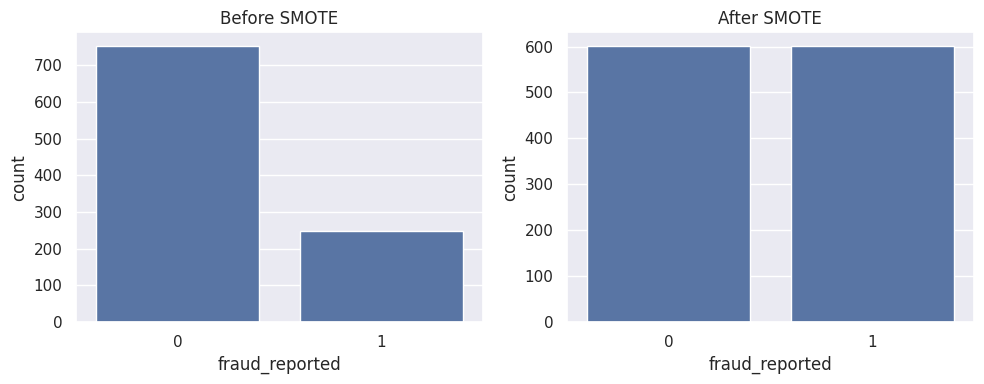

In [243]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='fraud_reported', data=df)
plt.title('Before SMOTE')

plt.subplot(1,2,2)
sns.countplot(x=y_train_smote_wl)
plt.title('After SMOTE')
plt.tight_layout()
plt.show()


After applying SMOTE, we manually compared the distributions of key numerical features to ensure the synthetic samples did not distort the original data structure.

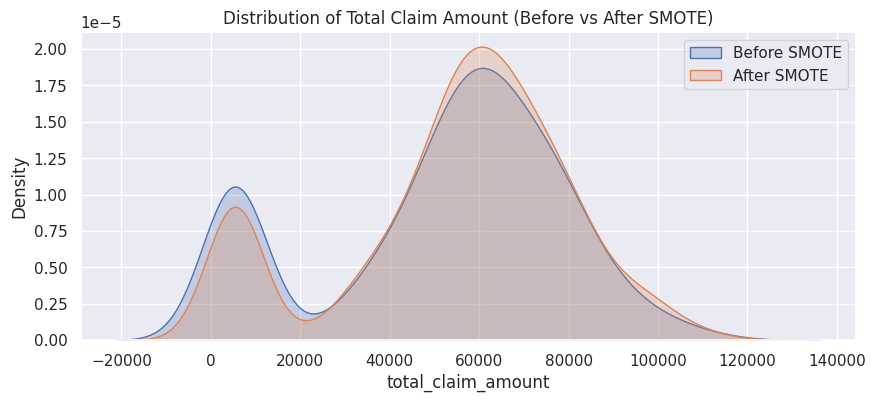

In [244]:
plt.figure(figsize=(10, 4))
sns.kdeplot(x_train_wl['total_claim_amount'], label='Before SMOTE', fill=True)
sns.kdeplot(x_train_smote_wl['total_claim_amount'], label='After SMOTE', fill=True)
plt.title('Distribution of Total Claim Amount (Before vs After SMOTE)')
plt.legend()
plt.show()

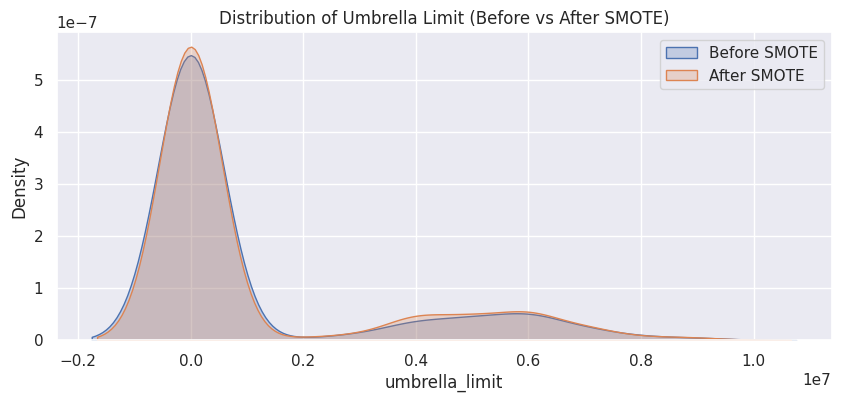

In [246]:
plt.figure(figsize=(10, 4))
sns.kdeplot(x_train_wl['umbrella_limit'], label='Before SMOTE', fill=True)
sns.kdeplot(x_train_smote_wl['umbrella_limit'], label='After SMOTE', fill=True)
plt.title('Distribution of Umbrella Limit (Before vs After SMOTE)')
plt.legend()
plt.show()

Both features show very similar distribution shapes before and after SMOTE. This confirms that the oversampling process maintained data realism and did not introduce unrealistic patterns.

### Model Training

#### GLM

In [118]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score,f1_score,classification_report,confusion_matrix

In [119]:
x_train_glm = x_train.copy().astype(int)

In [120]:
x_train_glm_cons = sm.add_constant(x_train_glm)

In [121]:
glm = sm.GLM(y_train,x_train_glm_cons,family=sm.families.Binomial())

In [122]:
glm_results = glm.fit()

In [123]:
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         fraud_reported   No. Observations:                  799
Model:                            GLM   Df Residuals:                      730
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -320.07
Date:                Wed, 04 Jun 2025   Deviance:                       640.14
Time:                        17:18:56   Pearson chi2:                     776.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2729
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [124]:
odds_ratios = np.exp(glm_results.params)
print("Odds Ratios:")
print(odds_ratios.sort_values(ascending=False))

Odds Ratios:
witnesses_2                               1.834953
insured_education_level_JD                1.819380
insured_occupation_sales                  1.620035
insured_education_level_College           1.534860
insured_occupation_craft-repair           1.473477
witnesses_1                               1.472710
insured_education_level_High School       1.449602
witnesses_3                               1.433435
insured_education_level_MD                1.392054
insured_relationship_other-relative       1.348370
insured_occupation_transport-moving       1.344380
insured_relationship_not-in-family        1.337938
insured_education_level_PhD               1.335274
insured_occupation_exec-managerial        1.315566
insured_occupation_armed-forces           1.311704
incident_state_OH                         1.304204
collision_type_unknown                    1.284540
policy_state_OH                           1.280379
incident_type_Parked Car                  1.254843
bodily_injuries_2 

Trivial Damage sharply reduces fraud odds, likely due to low payout potential.

Minor Damage lowers fraud risk significantly, as these claims are usually less severe.

Two witnesses slightly increase fraud probability, possibly due to unusual documentation.

JD education level mildly increases fraud suspicion, though not statistically strong.

Higher umbrella limits raise fraud likelihood, likely because of bigger potential payouts.

Claims from West Virginia show reduced fraud risk, possibly due to regional reporting patterns.

In [125]:
significant_features = glm_results.pvalues[glm_results.pvalues < 0.05].index.tolist()
print(significant_features)

['umbrella_limit_log', 'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage', 'incident_state_NY', 'incident_state_WV', 'witnesses_2']


In [126]:
x_test_glm = x_test.copy().astype('int')

In [127]:
x_test_gml_cons = sm.add_constant(x_test_glm)

In [128]:
glm_prob = glm_results.predict(x_test_gml_cons)

In [129]:
glm_pred = (glm_prob>=0.5).astype(int)

In [130]:
acc = accuracy_score(y_test,glm_pred)
prec = precision_score(y_test,glm_pred)
rec = recall_score(y_test,glm_pred)
f1 = f1_score(y_test,glm_pred)
roc = roc_auc_score(y_test,glm_prob)
c_report = classification_report(y_test,glm_pred)

In [131]:
print("GLM Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

GLM Results:
Accuracy:  0.785
Precision: 0.5882352941176471
Recall:    0.40816326530612246
F1 Score:  0.4819277108433735
ROC AUC:   0.7730774428976888
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.86       151
           1       0.59      0.41      0.48        49

    accuracy                           0.79       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.77      0.79      0.77       200



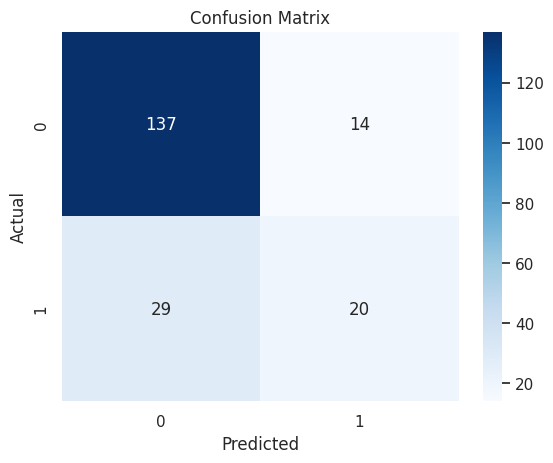

In [132]:
cm = confusion_matrix(y_test, glm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Logistic Regression

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train_smote)
x_test_st = scaler.transform(x_test)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lr = LogisticRegression()

In [137]:
lr.fit(x_train_st,y_train_smote)

LogisticRegression()

In [138]:
lr_pred = lr.predict(x_test_st)

In [139]:
lr_prob = lr.predict_proba(x_test_st)[:,1]

In [140]:
acc=accuracy_score(y_test,lr_pred)
prec = precision_score(y_test,lr_pred)
rec = recall_score(y_test,lr_pred)
f1 = f1_score(y_test,lr_pred)
roc = roc_auc_score(y_test,lr_prob)
c_report = classification_report(y_test,lr_pred)

In [ ]:
print("Logistic Regression Results:")
print(f"Accuracy:  {acc}") 
print(f"Precision: {prec}")
print(f"Recall:    {rec}") 
print(f"F1 Score:  {f1}") (f"ROC AUC:   {roc}") 
print(f"Classification Report: {c_report}")

Logistic Regression Results:
Accuracy:  0.79
Precision: 0.6060606060606061
Recall:    0.40816326530612246
F1 Score:  0.4878048780487805
ROC AUC:   0.7765914312744966
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87       151
           1       0.61      0.41      0.49        49

    accuracy                           0.79       200
   macro avg       0.72      0.66      0.68       200
weighted avg       0.77      0.79      0.77       200



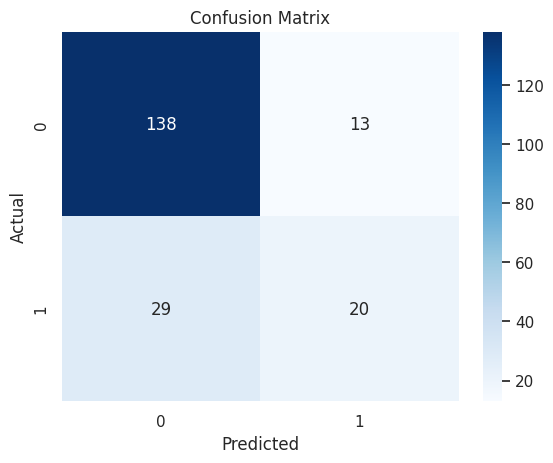

In [142]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

GLM and Logistic were my baseline models. They are interpretable and helped understand initial relationships .
However, they struggled with recall which is critical for catching fraud.

#### Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt = DecisionTreeClassifier(criterion ='gini',max_depth= 5, min_samples_leaf= 2, min_samples_split= 10) # If max_depth=5, the tree can split only 5 times before reaching a leaf.

In [145]:
dt.fit(x_train_smote_wl,y_train_smote_wl)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [146]:
dt_pred = dt.predict(x_test_wl)

In [147]:
dt_prob = dt.predict_proba(x_test_wl)[:,1]

In [148]:
acc=accuracy_score(y_test_wl,dt_pred)
prec = precision_score(y_test_wl,dt_pred)
rec = recall_score(y_test_wl,dt_pred)
f1 = f1_score(y_test_wl,dt_pred)
roc = roc_auc_score(y_test_wl,dt_prob)
c_report = classification_report(y_test_wl,dt_pred)

In [149]:
print("Decision Tree Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

Decision Tree Results:
Accuracy:  0.83
Precision: 0.631578947368421
Recall:    0.7346938775510204
F1 Score:  0.6792452830188679
ROC AUC:   0.8384916880659549
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.86      0.88       151
           1       0.63      0.73      0.68        49

    accuracy                           0.83       200
   macro avg       0.77      0.80      0.78       200
weighted avg       0.84      0.83      0.83       200



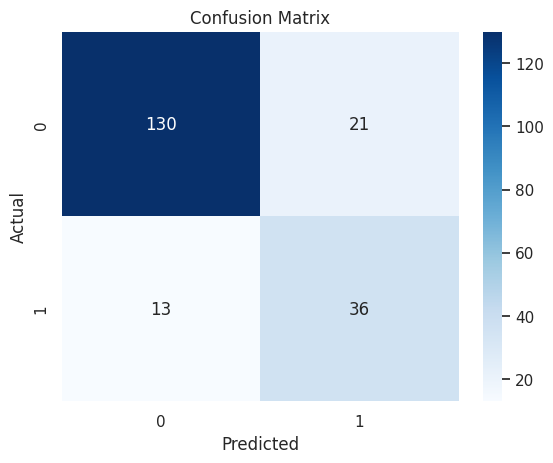

In [150]:
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Introduced Decision trees to capture non-linear interactions and improve recall which resulted in a significant boost in recall  and F1 score

In [151]:
import shap

In [152]:
explainer = shap.Explainer(dt,x_train_smote_wl.astype('int'))

In [153]:
shap_values = explainer(x_train_smote_wl.astype('int'))

In [154]:
print(type(shap_values))

<class 'shap._explanation.Explanation'>


In [155]:
print(np.shape(shap_values.values))

(1202, 160, 2)


In [156]:
shap_class_1 = shap_values[:,:,1]

In [157]:
shap_explanation_class_1 = shap.Explanation(
    values=shap_class_1,
    base_values=shap_values.base_values[:, 1],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

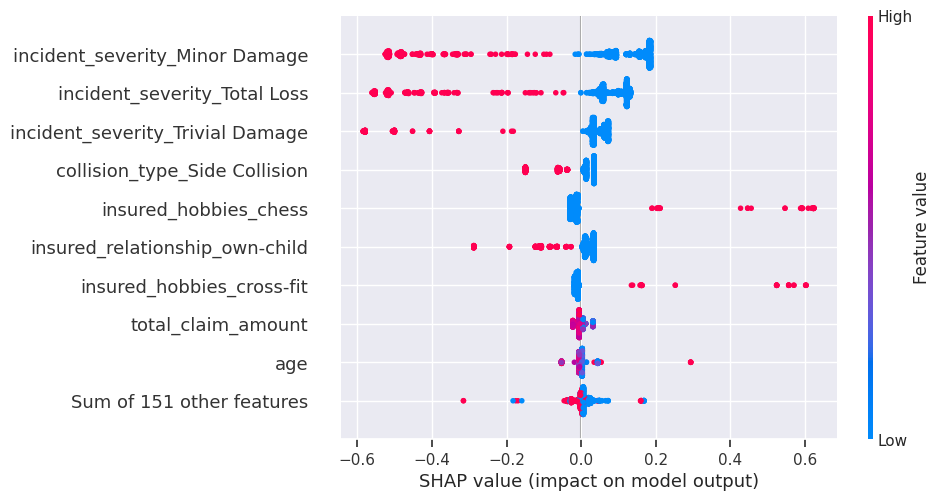

In [158]:
shap.plots.beeswarm(shap_explanation_class_1, max_display=10)

This SHAP beeswarm plot shows how different features influenced a single fraud prediction. The absence of Minor, Total, and Trivial Damage had the largest impact in reducing the fraud probability. Features like “collision_type_Side Collision” and hobbies like “chess” and “cross-fit” nudged the risk slightly higher, but their effect was relatively minor. Overall, the strong presence of low-risk indicators led the model to lean toward a non-fraud prediction.

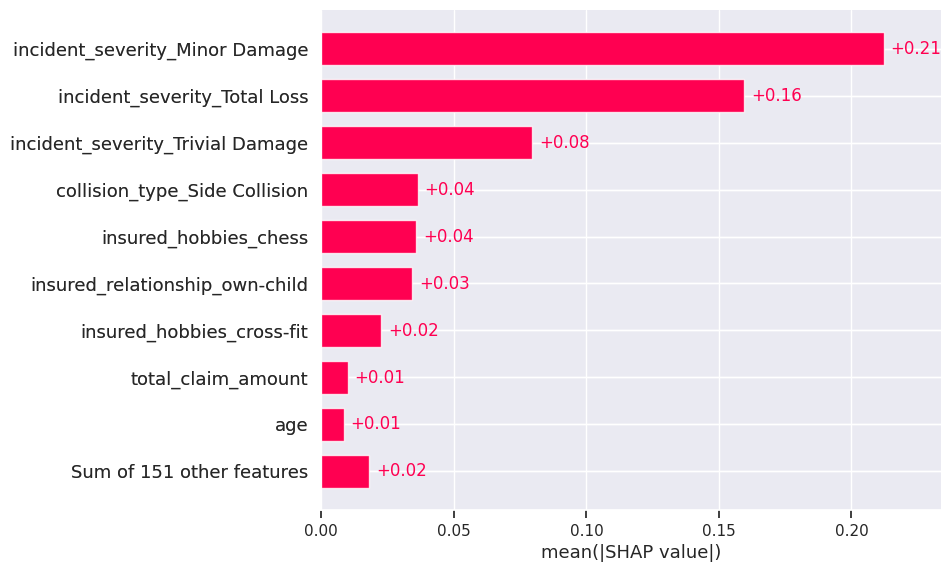

In [159]:
shap.plots.bar(shap_explanation_class_1,max_display=10)

In [160]:
index = 0
sample = x_test_wl.iloc[index:index+1]

In [161]:
sample = sample.astype(int)

In [162]:
explainer = shap.Explainer(dt, x_train_smote_wl.astype(int))
shap_values_single = explainer(sample)

In [163]:
shap_exp = shap.Explanation(
    values=shap_values_single.values[0, :, 1],
    base_values=shap_values_single.base_values[0, 1],
    data=shap_values_single.data[0],
    feature_names=shap_values_single.feature_names
)

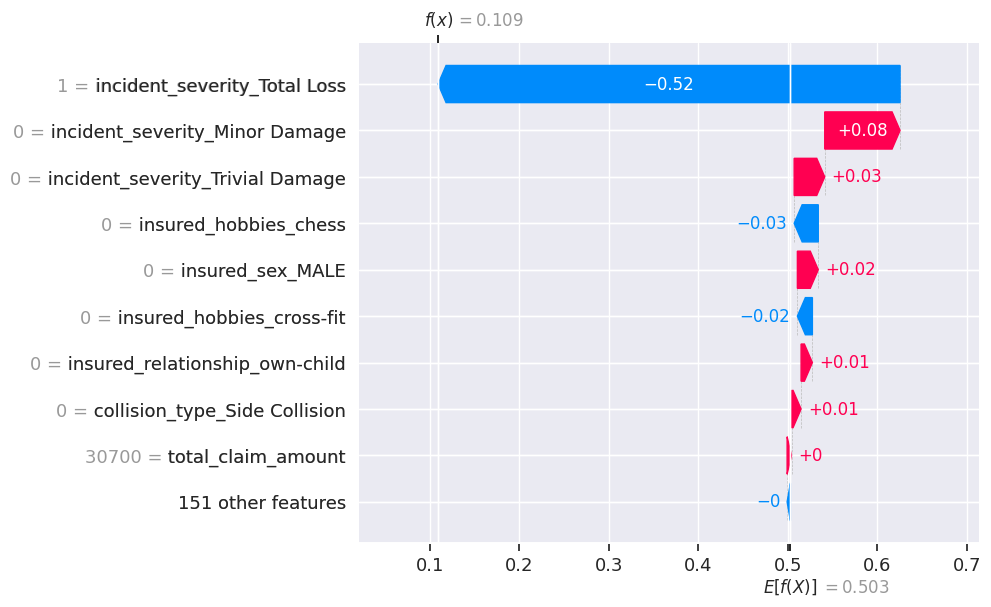

In [164]:
shap.plots.waterfall(shap_exp)

This insurance claim was predicted as non-fraudulent. The biggest reason was that it involved a "Total Loss," which strongly pushed the prediction away from fraud. While there were a few small positive signals like the absence of minor or trivial damage, and a slightly high claim amount, they weren't enough to override the strong negative influence of the total loss. Overall, the model leaned clearly toward classifying this case as genuine.

In [165]:
index = 3
sample = x_test_wl.iloc[index:index+1]

In [166]:
sample = sample.astype(int)

In [167]:
explainer = shap.Explainer(dt, x_train_smote_wl.astype(int))
shap_values_single = explainer(sample)

In [168]:
shap_exp = shap.Explanation(
    values=shap_values_single.values[0, :, 1],
    base_values=shap_values_single.base_values[0, 1],
    data=shap_values_single.data[0],
    feature_names=shap_values_single.feature_names
)

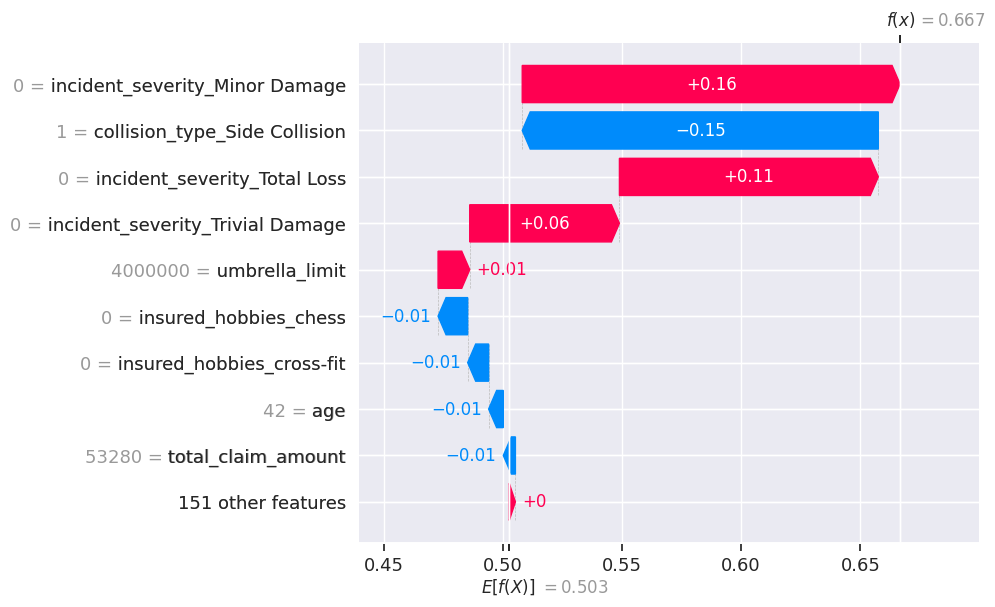

In [169]:
shap.plots.waterfall(shap_exp)

This prediction leaned slightly toward fraud, but not strongly. Features like the absence of minor damage and a total loss added to the fraud probability, while a side collision helped reduce it. Most other features like age, total claim amount, and hobbies had very minimal impact. Overall, the model predicted this claim as borderline but slightly suspicious.

In [215]:
importance = dt.feature_importances_
features = x_train_smote_wl.columns

#### Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier(n_estimators=100) #  The number of decision trees in the random forest.

In [172]:
rf.fit(x_train_smote_wl,y_train_smote_wl)

RandomForestClassifier()

In [173]:
rf_pred = rf.predict(x_test_wl)

In [174]:
rf_prob = rf.predict_proba(x_test_wl)[:,1]

In [175]:
acc = accuracy_score(y_test_wl,rf_pred)
prec = precision_score(y_test_wl,rf_pred)
rec = recall_score(y_test_wl,rf_pred)
f1 = f1_score(y_test_wl,rf_pred)
roc = roc_auc_score(y_test_wl,rf_prob)
c_report = classification_report(y_test_wl,rf_pred)

In [176]:
print("Random Forest Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

Random Forest Results:
Accuracy:  0.775
Precision: 0.5769230769230769
Recall:    0.30612244897959184
F1 Score:  0.4
ROC AUC:   0.8142992296256251
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.93      0.86       151
           1       0.58      0.31      0.40        49

    accuracy                           0.78       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.75      0.78      0.75       200



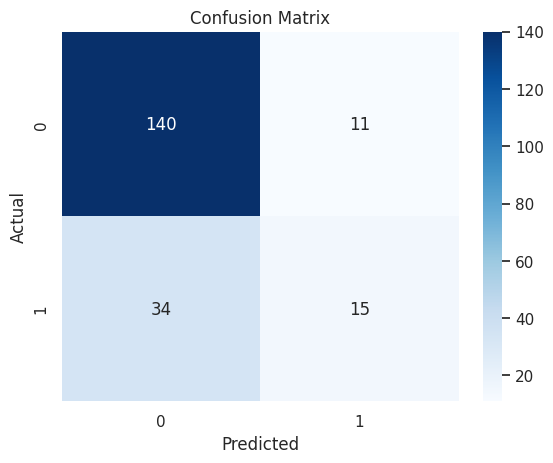

In [177]:
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot = True,fmt='d',cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### XGBoost

In [178]:
from xgboost import XGBClassifier

In [179]:
xgb = XGBClassifier( colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 5, n_estimators = 300, scale_pos_weight = 3, subsample = 0.8)

In [180]:
xgb.fit(x_train_smote_wl,y_train_smote_wl)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [181]:
xgb_pred = xgb.predict(x_test_wl)

In [182]:
xgb_prob = xgb.predict_proba(x_test_wl)[:,1]

In [183]:
acc = accuracy_score(y_test_wl,xgb_pred)
prec = precision_score(y_test_wl,xgb_pred)
rec = recall_score(y_test_wl,xgb_pred)
f1 = f1_score(y_test_wl,xgb_pred)
roc = roc_auc_score(y_test_wl,xgb_prob)
c_report = classification_report(y_test_wl,xgb_pred)

In [184]:
print("XGBoost Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

XGBoost Results:
Accuracy:  0.835
Precision: 0.6212121212121212
Recall:    0.8367346938775511
F1 Score:  0.7130434782608696
ROC AUC:   0.8509258007838897
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.83      0.88       151
           1       0.62      0.84      0.71        49

    accuracy                           0.83       200
   macro avg       0.78      0.84      0.80       200
weighted avg       0.86      0.83      0.84       200



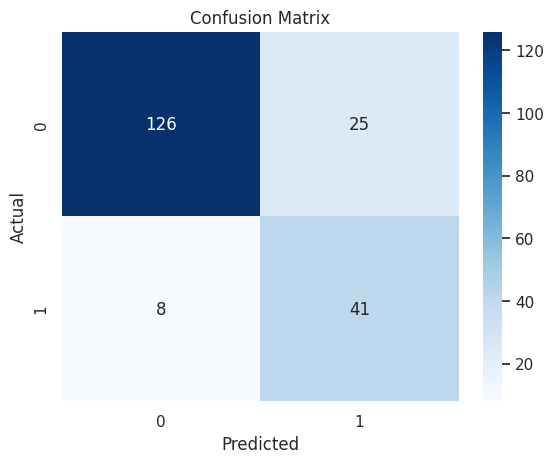

In [185]:
cm = confusion_matrix(y_test,xgb_pred)
sns.heatmap(cm, annot =True,cmap ='Blues',fmt ='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [186]:
#!pip install shap

In [187]:
import shap

In [188]:
x_train_shap = x_train_smote_wl.copy().astype('int')

In [189]:
explainer = shap.Explainer(xgb,x_train_shap)

In [190]:
shap_values = explainer(x_train_shap)


 96%|=================== | 1154/1202 [00:11<00:00]       

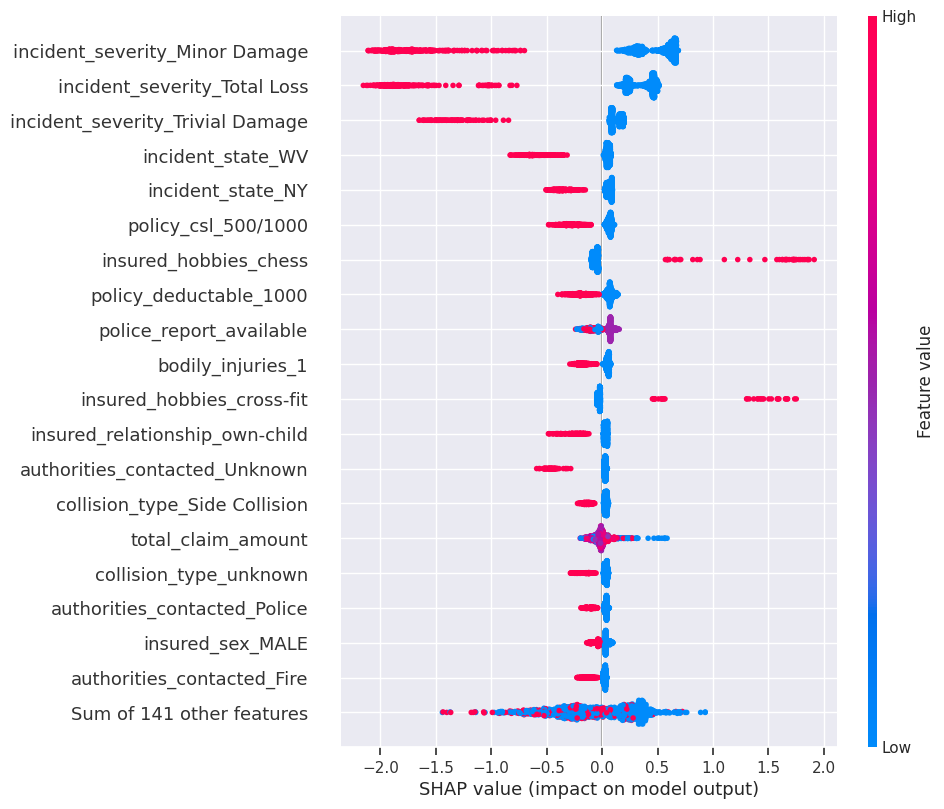

In [191]:
plt.figure(figsize=(12,6))
shap.plots.beeswarm(shap_values,max_display = 20)

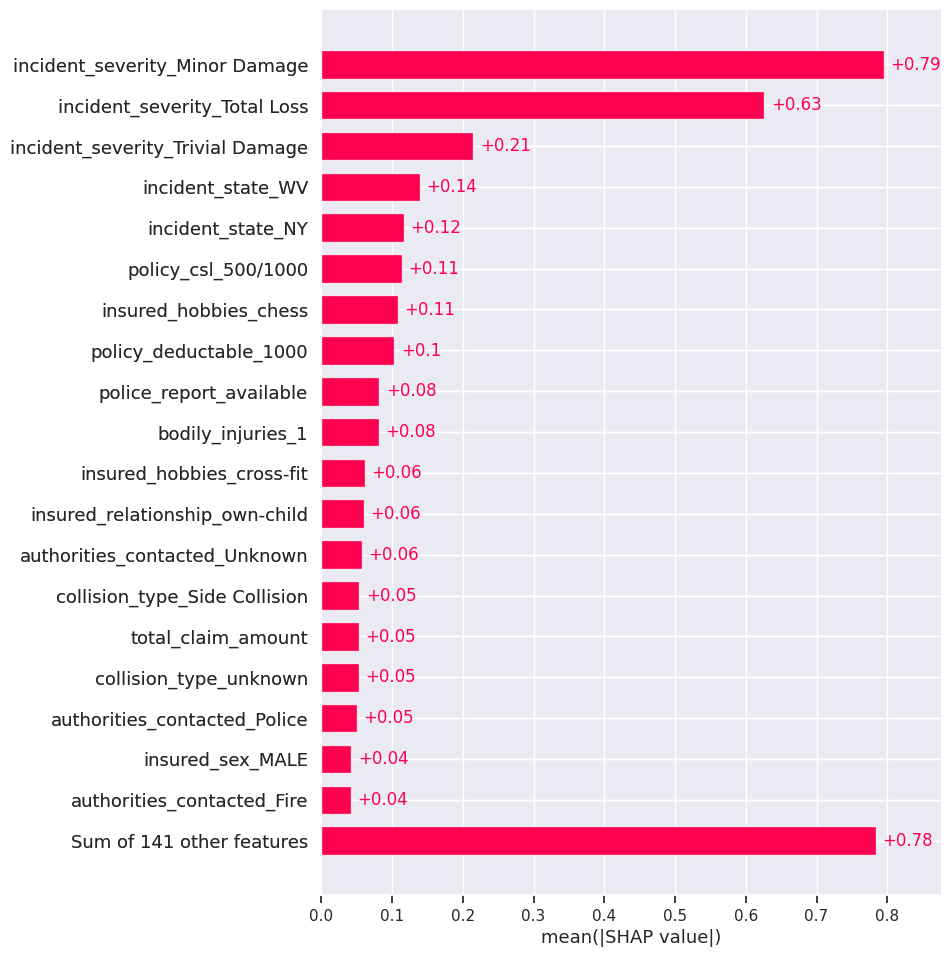

In [192]:
shap.plots.bar(shap_values, max_display=20)

These are the top features driving our fraud prediction model, with incident severity and certain state codes having the largest influence. We also observed rare features like ‘chess’ or unusual collision types impacting predictions, which may warrant closer inspection in real-world use

In [193]:
index = 0
sample = x_test_wl.iloc[index:index+1]

In [194]:
sample = sample.astype(int)

In [195]:
explainer = shap.Explainer(xgb, x_train_smote_wl.astype(int))
shap_values_single = explainer(sample)

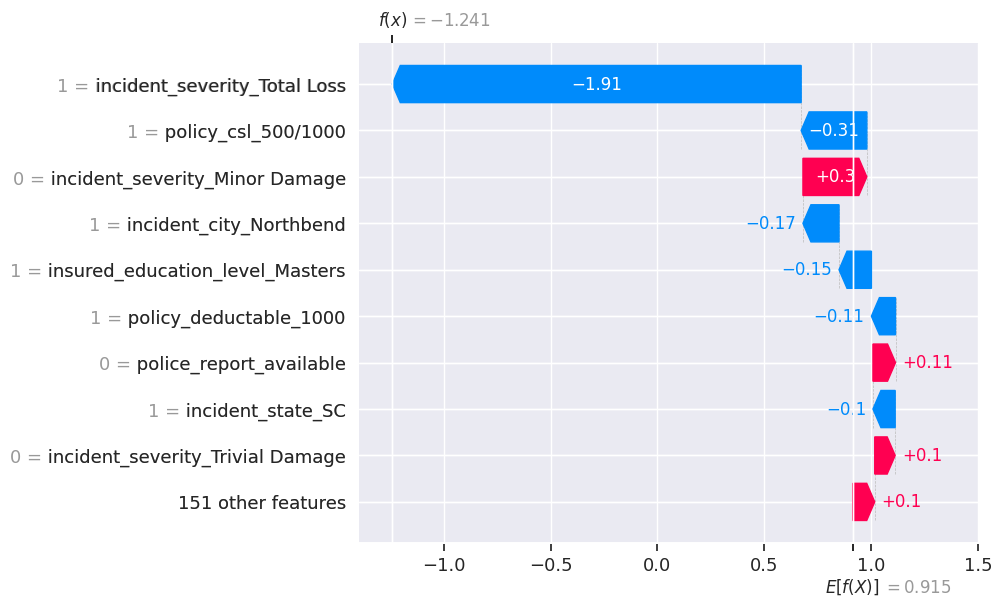

In [196]:
shap.plots.waterfall(shap_values_single[0])

This specific insurance claim was predicted as non-fraudulent, mainly because several strong factors pointed away from fraud. The claim was marked as a "Total Loss," which surprisingly reduced the likelihood of fraud, likely because these cases are usually well-documented and harder to fake. The policyholder also has a Master's degree and lives in Northbend, both of which are generally linked to lower fraud risk. Even though there was no police report which could normally be a red flag, it didn’t have a big enough impact to sway the prediction. The absence of minor or trivial damage pushed the risk up a little, but not enough to label the claim as fraud.

In [197]:
index = 1
sample = x_test_wl.iloc[index:index+1]

In [198]:
sample = sample.astype(int)

In [199]:
explainer = shap.Explainer(xgb, x_train_smote_wl.astype(int))
shap_values_single = explainer(sample)

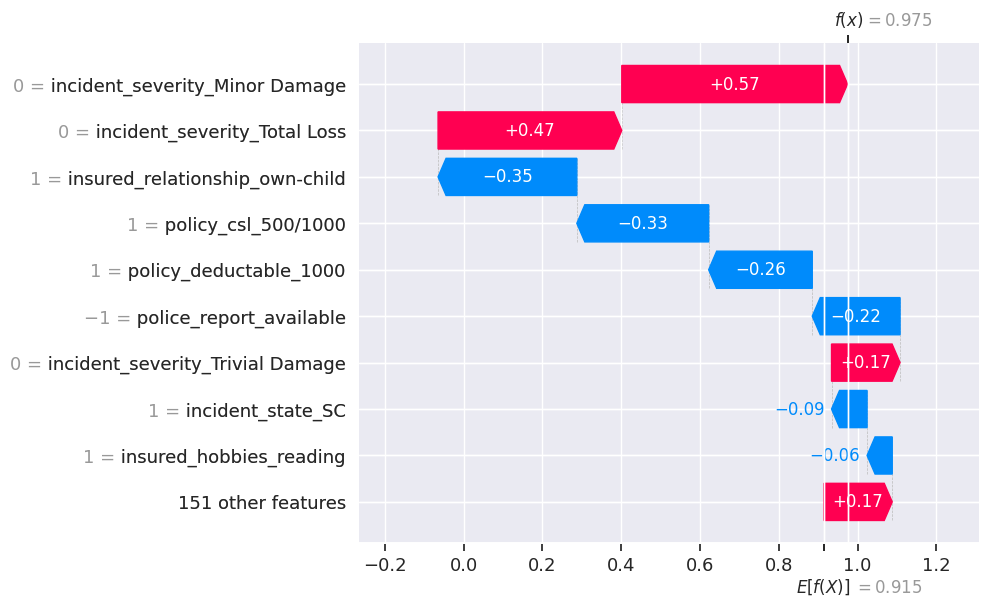

In [200]:
shap.plots.waterfall(shap_values_single[0])

This insurance claim was predicted as fraudulent because several factors strongly increased the fraud likelihood. The most influential was the presence of minor damage, which pushed the prediction significantly toward fraud. Along with it, the claim being labeled as a total loss also contributed heavily to raising suspicion. On the other hand, some features helped reduce the fraud score. For example, the policyholder was marked as a dependent child, which typically lowers fraud risk, and had a higher policy coverage limit with a large deductible, both of which generally align with lower fraud behavior. However, these risk-reducing signals were not strong enough to outweigh the fraud indicators, resulting in a final prediction of fraud.

In [219]:
from sklearn.inspection import PartialDependenceDisplay

#### LightGBM

In [220]:
#!pip install lightgbm

In [221]:
from lightgbm import LGBMClassifier

In [222]:
lg = LGBMClassifier(colsample_bytree = 0.8, learning_rate = 0.2, max_depth = 7, n_estimators = 100, scale_pos_weight = 3, subsample = 0.8)

In [223]:
lg.fit(x_train_smote_wl,y_train_smote_wl)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 601, number of negative: 601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7,
               scale_pos_weight=3, subsample=0.8)

In [224]:
lg_pred = lg.predict(x_test_wl)

In [225]:
lg_prob = lg.predict_proba(x_test_wl)[:,1]

In [226]:
acc = accuracy_score(y_test_wl,lg_pred)
prec = precision_score(y_test_wl,lg_pred)
rec = recall_score(y_test_wl,lg_pred)
f1 = f1_score(y_test_wl,lg_pred)
roc = roc_auc_score(y_test_wl,lg_pred)
c_report = classification_report(y_test_wl,lg_pred)

In [227]:
print("LightGBM Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

LightGBM Results:
Accuracy:  0.815
Precision: 0.6304347826086957
Recall:    0.5918367346938775
F1 Score:  0.6105263157894737
ROC AUC:   0.7396269766184619
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       151
           1       0.63      0.59      0.61        49

    accuracy                           0.81       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.81      0.81      0.81       200



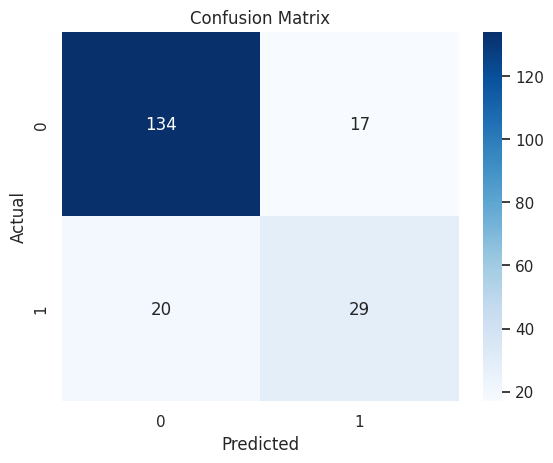

In [228]:
cm = confusion_matrix(y_test,lg_pred)
sns.heatmap(cm,annot = True, fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [229]:
import shap

In [230]:
explainer = shap.Explainer(lg,x_train_shap)

In [231]:
shap_values = explainer(x_train_shap)

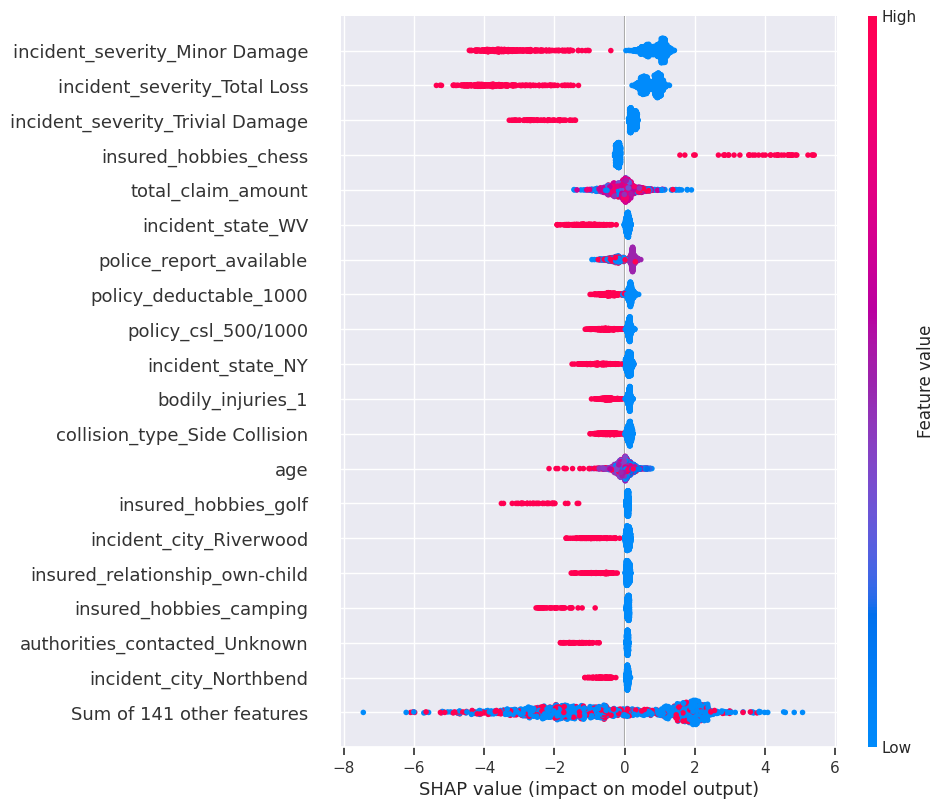

In [232]:
plt.figure(figsize=(12,6))
shap.plots.beeswarm(shap_values,max_display=20)

This SHAP plot shows that the LightGBM model relies heavily on how serious the damage was. Minor and total loss claims usually reduce fraud risk, while trivial damage increases it. Hobbies like chess and high claim amounts push the model toward predicting fraud. A few location and policy-related features also play a role, but severity is the biggest driver.

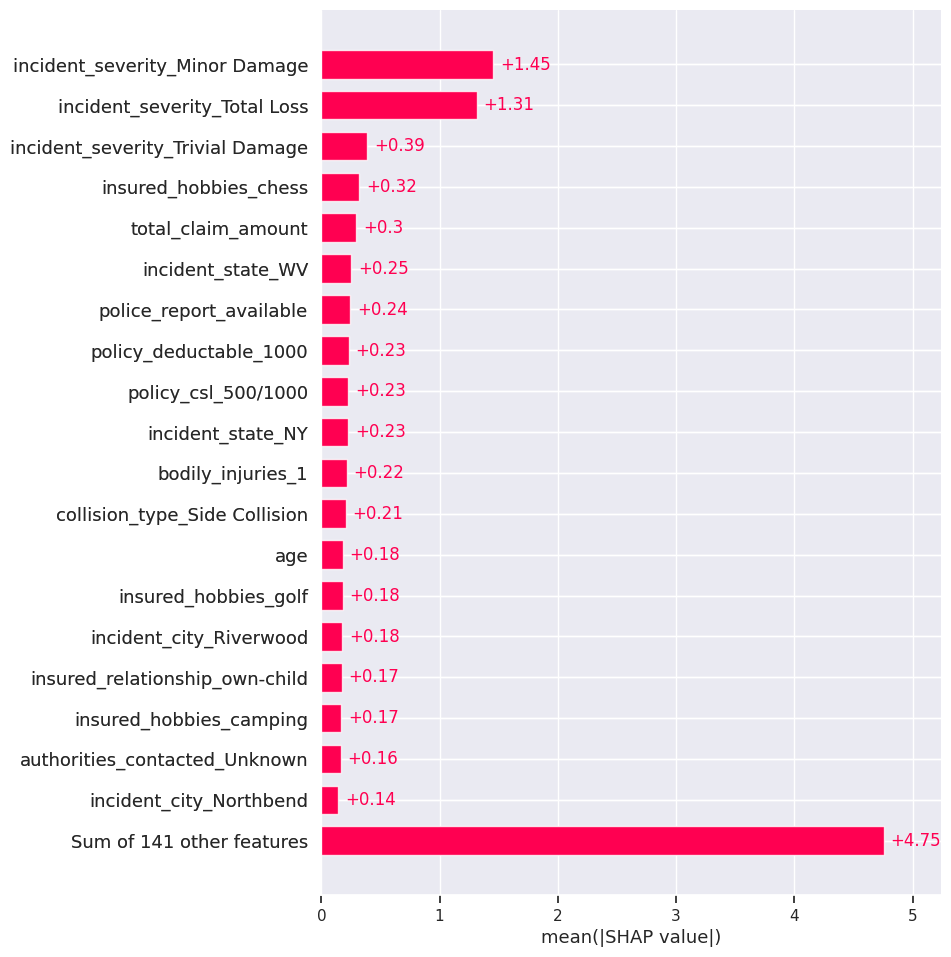

In [233]:
shap.plots.bar(shap_values,max_display=20)

In [234]:
index = 0
sample = x_test_wl.iloc[index:index+1].astype('int')

In [235]:
explainer = shap.Explainer(lg,x_train_shap)

In [236]:
shap_values = explainer(sample)

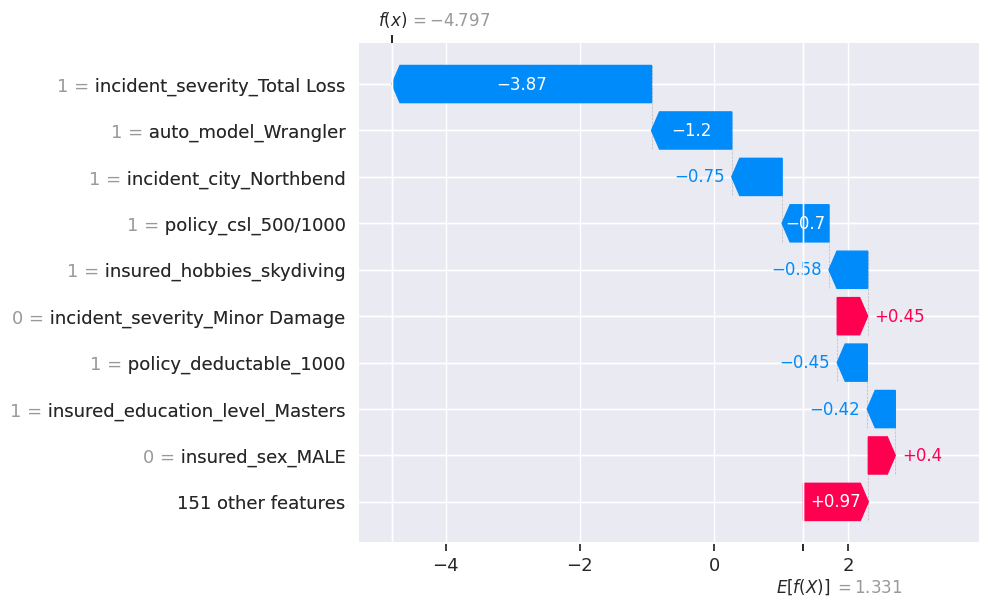

In [237]:
shap.plots.waterfall(shap_values[0])

This insurance claim was confidently predicted as non-fraudulent. The biggest factor pulling the score down was that it involved a Total Loss, which strongly reduced fraud risk. The car being a Wrangler and the location being Northbend also contributed to lower suspicion. Even though the customer had a high policy coverage and engaged in a risky hobby like skydiving, the overall profile leaned heavily toward non-fraud due to the overwhelming negative contributions.

In [238]:
index = 3
sample = x_test_wl[index:index+1].astype('int')

In [239]:
explainer = shap.Explainer(lg,x_train_shap)

In [240]:
shap_values = explainer(sample)

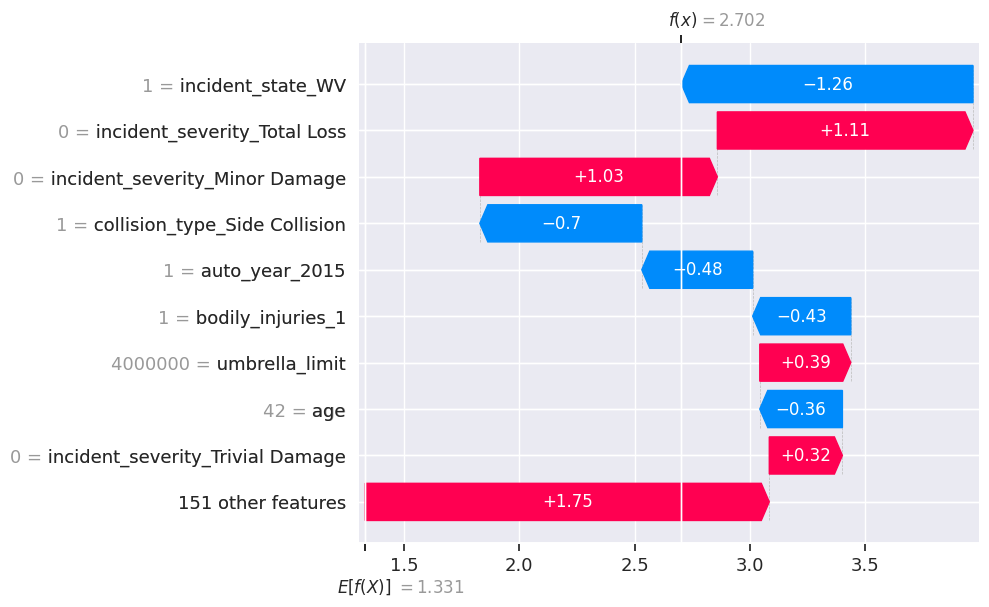

In [241]:
shap.plots.waterfall(shap_values[0])

This claim was predicted as fraudulent, driven by multiple red flags. The model was most influenced by the lack of Total Loss, presence of Minor Damage, and a high umbrella limit, all of which increased suspicion. Being from West Virginia and having a Side Collision slightly reduced the fraud score, but not enough to outweigh the risks. Overall, the pattern of small claims, bodily injuries, and modest car age tilted the decision toward fraud.

#### Support vector machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=42) #Tried rbf as well

In [ ]:
svm.fit(x_train_st,y_train_smote)

In [ ]:
svm_pred = svm.predict(x_test_st)

In [ ]:
svm_prob = svm.predict_proba(x_test_st)[:,1]

In [ ]:
acc = accuracy_score(y_test,svm_pred)
prec = precision_score(y_test,svm_pred)
rec = recall_score(y_test,svm_pred)
f1 = f1_score(y_test,svm_pred)
roc = roc_auc_score(y_test,svm_prob)
c_report = classification_report(y_test,svm_pred)

In [ ]:
print("SVM Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

In [ ]:
cm = confusion_matrix(y_test,svm_pred)
sns.heatmap(cm,annot = True, fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### KNN with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=25)# Keep 95% of the variance

In [ ]:
x_train_pca = pca.fit_transform(x_train_st)
x_test_pca = pca.transform(x_test_st)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train_pca,y_train_smote)

In [ ]:
knn_pred = knn.predict(x_test_pca)

In [ ]:
knn_prob = knn.predict_proba(x_test_pca)[:,1]

In [ ]:
acc = accuracy_score(y_test,knn_pred)
prec = precision_score(y_test,knn_pred)
rec = recall_score(y_test,knn_pred)
f1 = f1_score(y_test,knn_pred)
roc = roc_auc_score(y_test,knn_prob)
c_report = classification_report(y_test,knn_pred)

In [ ]:
print("KNN Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

In [ ]:
cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm,annot = True, fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',solver='adam',max_iter=300,random_state=42)

In [ ]:
mlp.fit(x_train_st,y_train_smote)

In [ ]:
mlp_pred = mlp.predict(x_test_st)

In [ ]:
mlp_prob = mlp.predict_proba(x_test_st)[:,1]

In [ ]:
acc = accuracy_score(y_test,mlp_pred)
prec = precision_score(y_test,mlp_pred)
rec = recall_score(y_test,mlp_pred)
f1 = f1_score(y_test,mlp_pred)
roc = roc_auc_score(y_test,mlp_prob)
c_report = classification_report(y_test,mlp_pred)

In [ ]:
print("MLP Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

In [ ]:
cm = confusion_matrix(y_test,mlp_pred)
sns.heatmap(cm,annot = True, fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter tuning

Based on all models we are choosing XGB,LGBM and DTR to perform Hyperparameter tuning as they were the best models with good recall 

### Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
dtr_best=DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search =GridSearchCV(estimator=dtr_best,param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1,verbose=1)

In [ ]:
grid_search.fit(x_train_smote_wl,y_train_smote_wl)

In [ ]:
best_dt = grid_search.best_params_

In [ ]:
print("Best Parameters:", grid_search.best_params_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_gid={
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]
}

In [ ]:
xgb_best = XGBClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=xgb_best,param_grid=param_gid,cv=5,scoring='f1',verbose=1,n_jobs=-1)

In [ ]:
grid_search.fit(x_train_smote_wl,y_train_smote_wl)

In [ ]:
best_xgb = grid_search.best_params_

In [ ]:
print("Best Parameters:", best_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [ ]:
lg_best = LGBMClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40], # should be <= 2^max_depth
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'class_weight': ['balanced', None]  # balances fraud class
}

In [ ]:
gird_search = GridSearchCV(estimator=lg_best,param_grid=param_gid,cv=5,verbose=1,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(x_train_smote,y_train_smote)

In [ ]:
best_params = grid_search.best_params_

In [ ]:
print("Best Parameters:", best_params)

#### Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
dt_sv = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 2, min_samples_split = 10)
xgb_sv = XGBClassifier( colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 5, n_estimators = 300, scale_pos_weight = 3, subsample = 0.8)
lg_sv = LGBMClassifier(colsample_bytree = 0.8, learning_rate = 0.2, max_depth = 7, n_estimators = 100, scale_pos_weight = 3, subsample = 0.8)

In [ ]:
voting_clf = VotingClassifier(estimators=[('dt',dt_sv),('xgb',xgb_sv),('lg',lg_sv)],voting='soft')

In [ ]:
voting_clf.fit(x_train_smote_wl,y_train_smote_wl)

In [ ]:
y_pred = voting_clf.predict(x_test_wl)

In [ ]:
y_prob = voting_clf.predict_proba(x_test_wl)[:,1]

In [ ]:
acc = accuracy_score(y_test_wl,y_pred)
prec = precision_score(y_test_wl,y_pred)
rec = recall_score(y_test_wl,y_pred)
f1 = f1_score(y_test_wl,y_pred)
roc = roc_auc_score(y_test_wl,y_prob)
c_report = classification_report(y_test_wl,y_pred)

In [ ]:
print("Soft Voting Results:")
print("Accuracy: ", acc)
print("Precision:", prec)
print("Recall:   ", rec)
print("F1 Score: ", f1)
print("ROC AUC:  ", roc)
print(f"Classification Report: {c_report}")

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Saving

In [ ]:
import joblib

In [ ]:
joblib.dump(voting_clf, '/content/drive/MyDrive/soft_voting_model_1.pkl')
print("model saved Successfully")

In [ ]:
model_columns = x_train_wl.columns.tolist()
joblib.dump(model_columns, "model_columns.pkl")